## Imports and loads 

In [1]:
import os, sys
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.metrics import r2_score
from sklearn import linear_model
from scipy.stats import linregress
from scipy.stats import spearmanr
from sklearn.base import  BaseEstimator, TransformerMixin, ClassifierMixin
from sklearn.model_selection import StratifiedShuffleSplit
from scipy.signal import butter, filtfilt, lfilter, welch, lfilter_zi, stft
import pandas as pd
from scipy.stats import spearmanr
from sklearn.model_selection import LeaveOneOut
import pickle
from time import time
from  scipy.spatial.distance import squareform
import matplotlib.colors as colors
import matplotlib.cm as cmx
import pickle

In [2]:
!pip install mne==0.19
import mne
!pip install git+https://github.com/UN-GCPDS/python-gcpds.utils.git
from gcpds.utils import loaddb

     |████████████████████████████████| 6.4MB 14.0MB/s 
  Cloning https://github.com/UN-GCPDS/python-gcpds.utils.git to /tmp/pip-req-build-8djcwsx7
  Running command git clone -q https://github.com/UN-GCPDS/python-gcpds.utils.git /tmp/pip-req-build-8djcwsx7
  Created wheel for gcpds-utils: filename=gcpds_utils-0.1a3-cp36-none-any.whl size=96836 sha256=159814263f27376c9afbe85db209850441be44e0596ac59024b57b79e147179f
  Stored in directory: /tmp/pip-ephem-wheel-cache-fcfq0q5y/wheels/ab/4a/1e/d215a31a12c0fa202a9bccc9b9d68874deb08dfdce8b7d43c8
Successfully built gcpds-utils


In [3]:
from mne.io.pick import _picks_to_idx
from mne.viz.topomap import _check_outlines, _draw_outlines
from mne.viz import plot_topomap

In [4]:
FILEID = "1Em1PGP6Ybpgu3Fx0HJznYELIr7obFufV"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O grafos_suxchaxfre.zip && rm -rf /tmp/cookies.txt
!dir
!unzip grafos_suxchaxfre.zip

--2020-12-23 19:20:51--  https://docs.google.com/uc?export=download&confirm=&id=1Em1PGP6Ybpgu3Fx0HJznYELIr7obFufV
Resolving docs.google.com (docs.google.com)... 172.217.9.206, 2607:f8b0:4004:807::200e
Connecting to docs.google.com (docs.google.com)|172.217.9.206|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-90-docs.googleusercontent.com/docs/securesc/emsujjkdps95dgjjtuhjf2f17fuf5qj2/1eeimo55ice1a8skovvpcn2jamc3m9lp/1608751200000/17600740636788319470/01203469918045490944Z/1Em1PGP6Ybpgu3Fx0HJznYELIr7obFufV?e=download [following]
--2020-12-23 19:20:53--  https://doc-0o-90-docs.googleusercontent.com/docs/securesc/emsujjkdps95dgjjtuhjf2f17fuf5qj2/1eeimo55ice1a8skovvpcn2jamc3m9lp/1608751200000/17600740636788319470/01203469918045490944Z/1Em1PGP6Ybpgu3Fx0HJznYELIr7obFufV?e=download
Resolving doc-0o-90-docs.googleusercontent.com (doc-0o-90-docs.googleusercontent.com)... 142.250.73.225, 2607:f8b0:4004:82a::2001
Connecting to doc-0o-90-d

## Networks definitions

In [5]:
seed = 100
np.random.seed(seed)
tf.random.set_seed(seed)
        
class SMRfeat(BaseEstimator, TransformerMixin):
  def __init__(self):
    self
      
  
  def scalerlist(self,Xfull):
     self.scaler = len(Xfull)*[None]
     for i in range(len(Xfull)):
        self.scaler[i] = StandardScaler()
        Xfull[i] = self.scaler[i].fit_transform(Xfull[i])
     return Xfull


  def fit(self,Xepochs,*_):
      
      Xfull = [Xepochs[:,:,i] for i in range(Xepochs.shape[2])]


      
      self.scalerlist(Xfull)
      return 

  def transform(self,Xepochs,*_):   
      
          
      
      Xfull = [Xepochs[:,:,i] for i in range(Xepochs.shape[2])]

      
      for i in range(len(Xfull)):
         self.scaler[i] = StandardScaler()
         Xfull[i] = self.scaler[i].fit_transform(Xfull[i])
      return Xfull

  def fit_transform(self,Xepochs,*_):
      self.fit(Xepochs)
      return self.transform(Xepochs)   
class MCSMRDNN(BaseEstimator, TransformerMixin):
  def __init__(self,epochs=200,batch_size=32,learning_rate=1e-3,optimizer='Adam',
                l1_param=1e-3,l2_param=1e-3,validation_split=0.2,verbose=0,fs=512,scalex=1,scaley=1,droprate=0.2,Mc_iter=100,alpha_dropout=True,plot_hst = False):
        self.epochs = epochs
        self.scalex = scalex
        self.scaley = scaley
        self.batch_size = batch_size
        self.learning_rate=learning_rate 
        self.l1_param=l1_param 
        self.l2_param=l2_param
        self.validation_split = validation_split
        self.verbose = verbose
        self.optimizer = optimizer
        self.fs=fs
        self.droprate = droprate
        self.Mc_iter = Mc_iter
        self.alpha_dropout = alpha_dropout
        self.plot_hst = plot_hst
  
  def fit(self,X,y,*_):

    #entrenar predictor SMRDNN
    if self.optimizer == "Adam":
        opt = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)
    elif self.optimizer == "SGD":
        opt = tf.keras.optimizers.SGD(learning_rate=self.learning_rate)
    else:
        opt=self.optimizer
    
    tf.keras.backend.clear_session()
    seed = 100
    np.random.seed(seed)
    tf.random.set_seed(seed)
    Q1f = 1.5
    Qff = 0.5
    l1 = self.l1_param
    l2 = self.l2_param
    act1 = 'tanh'
    actf = 'tanh'
    inputs = len(X)*[None]
    hiddens = len(X)*[None]
    drop_1 = len(X)*[None]
    winitializer = tf.keras.initializers.GlorotNormal(seed=seed)
    binitializer = "zeros"
    #h1
    for i in range(len(X)):
        inputs[i] = tf.keras.layers.Input(shape=(X[i].shape[1]), name='in_'+str(i))
        hiddens[i] = tf.keras.layers.Dense(int(X[i].shape[1]*Q1f),activation=act1,kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1,l2=l2),kernel_initializer=winitializer,bias_initializer=binitializer,name='h1_'+str(i))(inputs[i])
        if self.alpha_dropout:
            drop_1[i] = tf.keras.layers.AlphaDropout(self.droprate,seed=seed)(hiddens[i])
        else:
            drop_1[i] = tf.keras.layers.Dropout(self.droprate)(hiddens[i])
    #concat
    concat = tf.keras.layers.concatenate(drop_1,name='concat')
    #concat = tf.keras.layers.concatenate([h1c3psd,h1c4psd],name='concat')
    Qh = np.sum([X[i].shape[1]*Q1f for i in range(len(X))])
    
    hfi = tf.keras.layers.Dense(Qh*Qff,activation=actf,kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1,l2=l2),
                              kernel_initializer=winitializer,
                              bias_initializer=binitializer,name='hfi')(concat)
    if self.alpha_dropout:
        drop_2 = tf.keras.layers.AlphaDropout(rate=self.droprate)(hfi)
    else:
        drop_2 = tf.keras.layers.Dropout(rate=self.droprate)(hfi)
    #cla
    output_c = tf.keras.layers.Dense(1,activation="linear",kernel_initializer=winitializer, bias_initializer=binitializer,
                                    kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1,l2=l2),name='outc')(drop_2) 
    #input_full = [ic3_tuz,ic4_tuz,ic3_tbz,ic4_tbz,ic3_psdz,ic4_psdz]
    self.model_fun = tf.keras.Model(inputs=inputs,outputs=[output_c])

    self.model_fun.compile(loss=tf.keras.losses.mae,#self.custom_loss(),
              optimizer=opt) #f1, precision, recall, crossentropy

    self.history = self.model_fun.fit(x=X, y=y,verbose=self.verbose,
                        epochs=self.epochs,batch_size=self.batch_size,validation_split=self.validation_split)
    if self.plot_hst:
        self.plot_history_acc_w()
  def predict(self, X, *_):
    return np.stack([self.model_fun(X,training=True) for sample in range(self.Mc_iter)])#self.model_fun.predict(X)

  def fit_predict(self,X,y,*_):
      self.fit(X,y)
      return  self.predict(X)
  def get_model(self):
      return self.model_fun
  def plot_history_acc_w(self):
      hpd = pd.DataFrame(self.history.history)
      #hpd[['loss','val_loss']].plot()
      hpd.plot()
      plt.show()
      return


In [6]:
class SMRDNN(BaseEstimator, TransformerMixin):
  def __init__(self,epochs=200,batch_size=32,learning_rate=1e-3,optimizer='Adam',
                l1_param=1e-3,l2_param=1e-3,validation_split=0.2,verbose=0,fs=512,scalex=1,scaley=1):
        self.epochs = epochs
        self.scalex = scalex
        self.scaley = scaley
        self.batch_size = batch_size
        self.learning_rate=learning_rate 
        self.l1_param=l1_param 
        self.l2_param=l2_param
        self.validation_split = validation_split
        self.verbose = verbose
        self.optimizer = optimizer
        self.fs=fs
  
  def fit(self,X,y,*_):

    #entrenar predictor SMRDNN
    if self.optimizer == "Adam":
        opt = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)
    elif self.optimizer == "SGD":
        opt = tf.keras.optimizers.SGD(learning_rate=self.learning_rate)
    else:
        opt=self.optimizer
    
    tf.keras.backend.clear_session()
    seed = 100
    np.random.seed(seed)
    tf.random.set_seed(seed)

    Q1f = 1.5
    Qff = 0.5
    l1 = self.l1_param
    l2 = self.l2_param
    act1 = 'tanh'
    actf = 'tanh'
    inputs = len(X)*[None]
    hiddens = len(X)*[None]
    winitializer = tf.keras.initializers.GlorotNormal(seed=seed)
    binitializer = "zeros"
    #h1
    for i in range(len(X)):
        inputs[i] = tf.keras.layers.Input(shape=(X[i].shape[1]), name='in_'+str(i))
        hiddens[i] = tf.keras.layers.Dense(int(X[i].shape[1]*Q1f),activation=act1,kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1,l2=l2),kernel_initializer=winitializer,bias_initializer=binitializer,name='h1_'+str(i))(inputs[i])

    #concat
    concat = tf.keras.layers.concatenate(hiddens,name='concat')
    #concat = tf.keras.layers.concatenate([h1c3psd,h1c4psd],name='concat')
    Qh = np.sum([X[i].shape[1]*Q1f for i in range(len(X))])
    
    hfi = tf.keras.layers.Dense(Qh*Qff,activation=actf,kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1,l2=l2),
                              kernel_initializer=winitializer,
                              bias_initializer=binitializer,name='hfi')(concat)

    #cla
    output_c = tf.keras.layers.Dense(1,activation="linear",kernel_initializer=winitializer, bias_initializer=binitializer,
                                    kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1,l2=l2),name='outc')(hfi) 
    #input_full = [ic3_tuz,ic4_tuz,ic3_tbz,ic4_tbz,ic3_psdz,ic4_psdz]
    self.model_fun = tf.keras.Model(inputs=inputs,outputs=[output_c])

    self.model_fun.compile(loss=tf.keras.losses.mae,#self.custom_loss(),
              optimizer=opt) #f1, precision, recall, crossentropy

    self.history = self.model_fun.fit(x=X, y=y,verbose=self.verbose,
                        epochs=self.epochs,batch_size=self.batch_size,validation_split=self.validation_split)
    self.plot_history_acc_w()
  def predict(self, X, *_):
    return  self.model_fun.predict(X)

  def fit_predict(self,X,y,*_):
      self.fit(X,y)
      return  self.predict(X)
      
  def get_model(self):
      return self.model_fun

  def plot_history_acc_w(self):
      hpd = pd.DataFrame(self.history.history)
      #hpd[['loss','val_loss']].plot()
      hpd.plot()
      plt.show()
      return

## Functions definitions

In [7]:
def get_weigths(model,bands):
    W = []
    for i in range(bands):
        w = np.sum(abs(mdl.get_layer('h1_'+str(i)).get_weights()[0]),axis=1)
        w = w-min(w)
        w/= max(w)
        W.append(w)
    return W

In [8]:
def create_tensor_giga(graf,ind):
    xtensor = []
    for i in ind:
      if i>= 29 and i<34:
        subjs= graf[i-2,:,:]
      elif i>=34:
        subjs= graf[i-3,:,:]
      else:
        subjs= graf[i-1,:,:]

      try:
        xtensor+=[subjs]
      except:
        print('s'+str(i+1))

    xtensor= np.asarray(xtensor)
    print(xtensor.shape)
    return xtensor

In [9]:
def plot_topomap_cx(rho,fs, channels_names,montage,Ch,thr=0.5,size=(10,10),mode="topo",weigths=True,cmaps="jet",colormap=True,save=False,name=""):
    layout = mne.channels.read_layout('EEG1005')
    info = mne.create_info(layout.names, sfreq=fs, ch_types="eeg",montage=montage)
    pos = np.array([(p[0] + p[2] / 2., p[1] + p[3] / 2.) for p in layout.pos])

    # pick channels
    picks = _picks_to_idx(info,channels_names)
    pos = pos[picks]
    # adjust positions
    pos, outlines = _check_outlines(pos, 'head')
    pos_x = pos[:,0]
    pos_y = pos[:,1]
    names = np.array(layout.names)[picks]
    rho=((rho-rho.min())/(rho.max()-rho.min()))
    cmap = plt.cm.jet
    cNorm  = colors.Normalize(vmin=np.min(rho), vmax=np.max(rho))
    scalarMap = cmx.ScalarMappable(norm=cNorm,cmap=cmap)

    if weigths:
        rhotopo = squareform(rho).sum(axis=1)
    else:
        rhotopo = rho
    rhotopo = rhotopo-rhotopo.min()
    rhotopo /= rhotopo.max()
    
    f = plt.figure(figsize=size)
    ax = plt.axes()

    if mode=="topo":
        #P = int(0.5*Ch*(Ch-1))

        #plt.figure(figsize=(10,10))
        plot_topomap(rhotopo, pos, cmap=cmaps, show=False, contours=0, sensors=False,vmin=0,vmax=1)

    elif mode=="Cx":
        rhok = squareform(rho)

        if thr >1:
            indx_pct = np.where(np.triu(rhok)>np.percentile(rho, thr))
        else:
            indx_pct = np.where(np.triu(rhok)>thr)
        ax.set(xticks=[], yticks=[], aspect='equal')
        #ax[frec,time].scatter(pos[:,0],pos[:,1],100)
        _draw_outlines(ax, outlines)
        for i in range(np.shape(indx_pct)[-1]):
            ch1=indx_pct[0][i]
            ch2=indx_pct[1][i]     
            ax.arrow(pos_x[ch1],pos_y[ch1],pos_x[ch2]-pos_x[ch1],
                    pos_y[ch2]-pos_y[ch1],head_width=0.0,length_includes_head=False,
                    width=0.003,color=scalarMap.to_rgba(rhok[ch1,ch2]))
        for ch1 in  np.unique(np.ravel(indx_pct)):
            ax.scatter(pos_x[ch1],pos_y[ch1],50*np.sum(np.ravel(indx_pct)==ch1),'gray')
            ax.annotate(names[ch1], xy=pos[ch1,:],size=15)
        ax.axis("off")
    elif mode=="All":
        plot_topomap(rhotopo, pos, cmap=cmaps, show=False, contours=0, sensors=False,vmin=0,vmax=1)
        rhok = squareform(rho)

        if thr >1:
            indx_pct = np.where(np.triu(rhok)>np.percentile(rho, thr))
        else:
            indx_pct = np.where(np.triu(rhok)>thr)
        ax.set(xticks=[], yticks=[], aspect='equal')
        #ax[frec,time].scatter(pos[:,0],pos[:,1],100)
        _draw_outlines(ax, outlines)
        for i in range(np.shape(indx_pct)[-1]):
            ch1=indx_pct[0][i]
            ch2=indx_pct[1][i]     
            ax.arrow(pos_x[ch1],pos_y[ch1],pos_x[ch2]-pos_x[ch1],
                    pos_y[ch2]-pos_y[ch1],head_width=0.0,length_includes_head=False,
                    width=0.003,color=scalarMap.to_rgba(rhok[ch1,ch2]))
        for ch1 in  np.unique(np.ravel(indx_pct)):
            ax.scatter(pos_x[ch1],pos_y[ch1],50*np.sum(np.ravel(indx_pct)==ch1),'gray')
            ax.annotate(names[ch1], xy=pos[ch1,:],size=15)
        

    if colormap:
        cax = f.add_axes([0.95, 0.125, 0.02, 0.75])
        sm = plt.cm.ScalarMappable(cmap='jet')
        sm.set_array(rho.ravel())
        plt.colorbar(sm,cax=cax)
    
    if save:
        plt.savefig(name+'.eps',format='eps',dpi=100,bbox_inches='tight')

    plt.show()

## Path definition

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
Path_def = "/content/drive/MyDrive/CX_Regression/codigos/giga/Figs/"


# PLV Runs

In [14]:
FILEID = "1Oz0eBrVKJdAYXYuRJrMPHgIihW5YaUA5"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O Data_rest_giga.zip && rm -rf /tmp/cookies.txt
!dir
!unzip Data_rest_giga.zip

--2020-12-23 19:29:19--  https://docs.google.com/uc?export=download&confirm=&id=1Oz0eBrVKJdAYXYuRJrMPHgIihW5YaUA5
Resolving docs.google.com (docs.google.com)... 172.217.9.206, 2607:f8b0:4004:808::200e
Connecting to docs.google.com (docs.google.com)|172.217.9.206|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-7g-docs.googleusercontent.com/docs/securesc/mvesgpq2lk5cknfgtgdinp30pol5mc48/8r86otg2ek2ubi854fdlt5vsnn8kau7e/1608751725000/13064322042220169363/13165150469493872117Z/1Oz0eBrVKJdAYXYuRJrMPHgIihW5YaUA5?e=download [following]
--2020-12-23 19:29:23--  https://doc-0c-7g-docs.googleusercontent.com/docs/securesc/mvesgpq2lk5cknfgtgdinp30pol5mc48/8r86otg2ek2ubi854fdlt5vsnn8kau7e/1608751725000/13064322042220169363/13165150469493872117Z/1Oz0eBrVKJdAYXYuRJrMPHgIihW5YaUA5?e=download
Resolving doc-0c-7g-docs.googleusercontent.com (doc-0c-7g-docs.googleusercontent.com)... 142.250.73.225, 2607:f8b0:4004:82a::2001
Connecting to doc-0c-7g-d

In [12]:
#https://drive.google.com/file/d/1gKfBV3-owYj1PyQA6gddcdNN0xVO93Em/view?usp=sharing
FILEID = "1gKfBV3-owYj1PyQA6gddcdNN0xVO93Em"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O conectividades_10runs_cruzadas.pickle && rm -rf /tmp/cookies.txt
!dir

--2020-12-23 19:26:53--  https://docs.google.com/uc?export=download&confirm=&id=1gKfBV3-owYj1PyQA6gddcdNN0xVO93Em
Resolving docs.google.com (docs.google.com)... 172.217.9.206, 2607:f8b0:4004:806::200e
Connecting to docs.google.com (docs.google.com)|172.217.9.206|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-5g-docs.googleusercontent.com/docs/securesc/6nr8iepldts3oi1te55pc6kor5ksqhlo/fob9odau0fvb2c61opt6c8nqlkvedjhg/1608751575000/17600740636788319470/03608563216882091288Z/1gKfBV3-owYj1PyQA6gddcdNN0xVO93Em?e=download [following]
--2020-12-23 19:26:54--  https://doc-00-5g-docs.googleusercontent.com/docs/securesc/6nr8iepldts3oi1te55pc6kor5ksqhlo/fob9odau0fvb2c61opt6c8nqlkvedjhg/1608751575000/17600740636788319470/03608563216882091288Z/1gKfBV3-owYj1PyQA6gddcdNN0xVO93Em?e=download
Resolving doc-00-5g-docs.googleusercontent.com (doc-00-5g-docs.googleusercontent.com)... 142.250.73.225, 2607:f8b0:4004:82a::2001
Connecting to doc-00-5g-d

In [15]:
mea = loadmat('Data_resting_C3andC4.mat')['means']
sc_ma = StandardScaler()
acc_m = mea.mean(axis=1)
ma_z = sc_ma.fit_transform(mea) 
zpca = ma_z[:,3].reshape(-1,1)
zpca.shape
indx = loadmat('Means_giga_mayo.mat')['S1'].ravel()

In [18]:
conectividades_10runs_cruzadas= pickle.load( open( "/content/conectividades_10runs_cruzadas.pickle", "rb" ) )
tipos = [2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 1, 1, 1, 1 , 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1]#[1 2 3]

clases = [[2,0,None],[1,None,None], [0,1,None], [0,1,2],
            [2,0,None],[1,None,None], [0,1,None], [0,1,2],
            [2,0,None],[1,None,None], [0,1,None], [0,1,2],
            [2,0,None],[1,None,None], [0,1,None], [0,1,2]]

todas_conectividades = []
fs      =512
t       = 2
conec=0
nombre=1
for tipe in clases:
#seleccion de index por clase de sujetos
    newindx = []
    for i in range(len(tipos)):
      if tipos[i]==tipe[0] or tipos[i]==tipe[1] or tipos[i]==tipe[2]:
        newindx += [indx[i]]
    print(len(newindx))
    #
    newzpca = []
    for i in range(len(tipos)):
      if tipos[i]==tipe[0] or tipos[i]==tipe[1] or tipos[i]==tipe[2]:
        newzpca.append(zpca[i][0])        
    newzpca= np.array(newzpca)
    newzpca= newzpca.reshape(-1,1)
    print(newzpca.shape)

    xtensor= conectividades_10runs_cruzadas[conec]
    conec=conec+1

    ### cargar datos de todas_conectividades

    x = xtensor
    y = newzpca

    feats= SMRfeat()
    X_feat = feats.fit_transform(x)
    net= MCSMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1,plot_hst=True,alpha_dropout=False)
    predict_data = net.fit(X_feat , y) 
    mdl = net.get_model()
    w = get_weigths(mdl,4)
    db = loaddb.GIGA()
    channels_names = db.metadata['channel_names']
    montage = mne.channels.read_montage(db.metadata['montage'])

    Model = {}
    #Model["model"] = mdl
    Model["weigths"] = w
    Model["Ch_names"] = channels_names
    Model["montage"] = montage

    with open(Path_def+'modelsruns/plv_2f_MC_'+str(nombre)+'.p','wb') as handle:
                    pickle.dump(Model,handle)
    
    ######graficas
    plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",colormap=False,save=True,name=Path_def+'Topoplotsruns/plv_2f_MC_'+str(nombre)+'topo_u_anter')
    plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="Cx",colormap=False,save=True,name=Path_def+'Topoplotsruns/plv_2f_MC_'+str(nombre)+'CX_u_anter')
    plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="All",cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplotsruns/plv_2f_MC_'+str(nombre)+'All_u_anter')

    plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",colormap=False,save=True,name=Path_def+'Topoplotsruns/plv_2f_MC_'+str(nombre)+'topo_B_anter')
    plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="Cx",colormap=False,save=True,name=Path_def+'Topoplotsruns/plv_2f_MC_'+str(nombre)+'CX_B_anter')
    plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="All",cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplotsruns/plv_2f_MC_'+str(nombre)+'All_B_anter')

    plot_topomap_cx(w[2],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",colormap=False,save=True,name=Path_def+'Topoplotsruns/plv_2f_MC_'+str(nombre)+'topo_u_sig')
    plot_topomap_cx(w[2],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="Cx",colormap=False,save=True,name=Path_def+'Topoplotsruns/plv_2f_MC_'+str(nombre)+'CX_u_sig')
    plot_topomap_cx(w[2],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="All",cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplotsruns/plv_2f_MC_'+str(nombre)+'All_u_sig')

    plot_topomap_cx(w[3],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",colormap=False,save=True,name=Path_def+'Topoplotsruns/plv_2f_MC_'+str(nombre)+'topo_B_sig')
    plot_topomap_cx(w[3],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="Cx",colormap=False,save=True,name=Path_def+'Topoplotsruns/plv_2f_MC_'+str(nombre)+'CX_B_sig')
    plot_topomap_cx(w[3],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="All",cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplotsruns/plv_2f_MC_'+str(nombre)+'All_B_sig')


    nombre= nombre +1

Output hidden; open in https://colab.research.google.com to view.

In [20]:
#https://drive.google.com/file/d/15tmJjS6iq368QLbBDKiKbPPJUIx8k8iS/view?usp=sharing
FILEID = "15tmJjS6iq368QLbBDKiKbPPJUIx8k8iS"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O conec_trial_0comparado5-15.pickle && rm -rf /tmp/cookies.txt
!dir

--2020-12-23 20:02:00--  https://docs.google.com/uc?export=download&confirm=&id=15tmJjS6iq368QLbBDKiKbPPJUIx8k8iS
Resolving docs.google.com (docs.google.com)... 172.217.13.78, 2607:f8b0:4004:815::200e
Connecting to docs.google.com (docs.google.com)|172.217.13.78|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-00-docs.googleusercontent.com/docs/securesc/rt3s8p43ufmavtdgr2599ckljicrpkiu/aaf6kuku8u6nbp6384anbr3875jqhcqq/1608753675000/17600740636788319470/02270259850351742197Z/15tmJjS6iq368QLbBDKiKbPPJUIx8k8iS?e=download [following]
--2020-12-23 20:02:01--  https://doc-0c-00-docs.googleusercontent.com/docs/securesc/rt3s8p43ufmavtdgr2599ckljicrpkiu/aaf6kuku8u6nbp6384anbr3875jqhcqq/1608753675000/17600740636788319470/02270259850351742197Z/15tmJjS6iq368QLbBDKiKbPPJUIx8k8iS?e=download
Resolving doc-0c-00-docs.googleusercontent.com (doc-0c-00-docs.googleusercontent.com)... 142.250.73.225, 2607:f8b0:4004:82a::2001
Connecting to doc-0c-00-d

In [28]:
conectividades_0trial_cruzado= pickle.load( open( "/content/conec_trial_0comparado5-15.pickle", "rb" ) )
tipos = [2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 1, 1, 1, 1 , 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1]#[1 2 3]

clases = [[2,0,None],[1,None,None], [0,1,None], [0,1,2],
            [2,0,None],[1,None,None], [0,1,None], [0,1,2],
            [2,0,None],[1,None,None], [0,1,None], [0,1,2]]

todas_conectividades = []
fs      =512
t       = 2
nombre = 1
conec=0
for tipe in clases:
#seleccion de index por clase de sujetos
    newindx = []
    for i in range(len(tipos)):
      if tipos[i]==tipe[0] or tipos[i]==tipe[1] or tipos[i]==tipe[2]:
        newindx += [indx[i]]
    print(len(newindx))
    #
    newzpca = []
    for i in range(len(tipos)):
      if tipos[i]==tipe[0] or tipos[i]==tipe[1] or tipos[i]==tipe[2]:
        newzpca.append(zpca[i][0])        
    newzpca= np.array(newzpca)
    newzpca= newzpca.reshape(-1,1)
    print(newzpca.shape)

    xtensor= conectividades_0trial_cruzado[conec]
    conec=conec+1

    ### cargar datos de todas_conectividades

    x = xtensor
    y = newzpca

    feats= SMRfeat()
    X_feat = feats.fit_transform(x)
    net= MCSMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1,plot_hst=True,alpha_dropout=False)
    predict_data = net.fit(X_feat , y) 
    mdl = net.get_model()
    w = get_weigths(mdl,4)
    db = loaddb.GIGA()
    channels_names = db.metadata['channel_names']
    montage = mne.channels.read_montage(db.metadata['montage'])

    Model = {}
    #Model["model"] = mdl
    Model["weigths"] = w
    Model["Ch_names"] = channels_names
    Model["montage"] = montage

    with open(Path_def+'modelsrunscruzado/plv_2f_MC_'+str(nombre)+'.p','wb') as handle:
                    pickle.dump(Model,handle)
    
    ######graficas
    plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",colormap=False,save=True,name=Path_def+'Topoplotsrunscruzado/plv_2f_MC_'+str(nombre)+'topo_u_anter')
    plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="Cx",colormap=False,save=True,name=Path_def+'Topoplotsrunscruzado/plv_2f_MC_'+str(nombre)+'CX_u_anter')
    plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="All",cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplotsrunscruzado/plv_2f_MC_'+str(nombre)+'All_u_anter')

    plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",colormap=False,save=True,name=Path_def+'Topoplotsrunscruzado/plv_2f_MC_'+str(nombre)+'topo_B_anter')
    plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="Cx",colormap=False,save=True,name=Path_def+'Topoplotsrunscruzado/plv_2f_MC_'+str(nombre)+'CX_B_anter')
    plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="All",cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplotsrunscruzado/plv_2f_MC_'+str(nombre)+'All_B_anter')

    plot_topomap_cx(w[2],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",colormap=False,save=True,name=Path_def+'Topoplotsrunscruzado/plv_2f_MC_'+str(nombre)+'topo_u_sig')
    plot_topomap_cx(w[2],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="Cx",colormap=False,save=True,name=Path_def+'Topoplotsrunscruzado/plv_2f_MC_'+str(nombre)+'CX_u_sig')
    plot_topomap_cx(w[2],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="All",cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplotsrunscruzado/plv_2f_MC_'+str(nombre)+'All_u_sig')

    plot_topomap_cx(w[3],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",colormap=False,save=True,name=Path_def+'Topoplotsrunscruzado/plv_2f_MC_'+str(nombre)+'topo_B_sig')
    plot_topomap_cx(w[3],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="Cx",colormap=False,save=True,name=Path_def+'Topoplotsrunscruzado/plv_2f_MC_'+str(nombre)+'CX_B_sig')
    plot_topomap_cx(w[3],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="All",cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplotsrunscruzado/plv_2f_MC_'+str(nombre)+'All_B_sig')


    nombre= nombre +1

Output hidden; open in https://colab.research.google.com to view.

In [24]:
nombre

22

In [ ]:
#https://drive.google.com/file/d/1iN3QpMffbVkbzMNQ9glvT_dt_2N8Ie8d/view?usp=sharing
FILEID = "1iN3QpMffbVkbzMNQ9glvT_dt_2N8Ie8d"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O conec_trial_0comparado20-25.pickle && rm -rf /tmp/cookies.txt
!dir

In [29]:
conectividades_0trial_cruzado= pickle.load( open( "/content/conec_trial_0comparado20-25.pickle", "rb" ) )
tipos = [2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 1, 1, 1, 1 , 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1]#[1 2 3]

clases = [[2,0,None],[1,None,None], [0,1,None], [0,1,2],
            [2,0,None],[1,None,None], [0,1,None], [0,1,2]]

todas_conectividades = []
fs      =512
t       = 2
conec=0
for tipe in clases:
#seleccion de index por clase de sujetos
    newindx = []
    for i in range(len(tipos)):
      if tipos[i]==tipe[0] or tipos[i]==tipe[1] or tipos[i]==tipe[2]:
        newindx += [indx[i]]
    print(len(newindx))
    #
    newzpca = []
    for i in range(len(tipos)):
      if tipos[i]==tipe[0] or tipos[i]==tipe[1] or tipos[i]==tipe[2]:
        newzpca.append(zpca[i][0])        
    newzpca= np.array(newzpca)
    newzpca= newzpca.reshape(-1,1)
    print(newzpca.shape)

    xtensor= conectividades_0trial_cruzado[conec]
    conec=conec+1

    ### cargar datos de todas_conectividades

    x = xtensor
    y = newzpca

    feats= SMRfeat()
    X_feat = feats.fit_transform(x)
    net= MCSMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1,plot_hst=True,alpha_dropout=False)
    predict_data = net.fit(X_feat , y) 
    mdl = net.get_model()
    w = get_weigths(mdl,4)
    db = loaddb.GIGA()
    channels_names = db.metadata['channel_names']
    montage = mne.channels.read_montage(db.metadata['montage'])

    Model = {}
    #Model["model"] = mdl
    Model["weigths"] = w
    Model["Ch_names"] = channels_names
    Model["montage"] = montage

    with open(Path_def+'modelsrunscruzado/plv_2f_MC_'+str(nombre)+'.p','wb') as handle:
                    pickle.dump(Model,handle)
    
    ######graficas
    plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",colormap=False,save=True,name=Path_def+'Topoplotsrunscruzado/plv_2f_MC_'+str(nombre)+'topo_u_anter')
    plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="Cx",colormap=False,save=True,name=Path_def+'Topoplotsrunscruzado/plv_2f_MC_'+str(nombre)+'CX_u_anter')
    plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="All",cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplotsrunscruzado/plv_2f_MC_'+str(nombre)+'All_u_anter')

    plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",colormap=False,save=True,name=Path_def+'Topoplotsrunscruzado/plv_2f_MC_'+str(nombre)+'topo_B_anter')
    plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="Cx",colormap=False,save=True,name=Path_def+'Topoplotsrunscruzado/plv_2f_MC_'+str(nombre)+'CX_B_anter')
    plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="All",cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplotsrunscruzado/plv_2f_MC_'+str(nombre)+'All_B_anter')

    plot_topomap_cx(w[2],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",colormap=False,save=True,name=Path_def+'Topoplotsrunscruzado/plv_2f_MC_'+str(nombre)+'topo_u_sig')
    plot_topomap_cx(w[2],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="Cx",colormap=False,save=True,name=Path_def+'Topoplotsrunscruzado/plv_2f_MC_'+str(nombre)+'CX_u_sig')
    plot_topomap_cx(w[2],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="All",cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplotsrunscruzado/plv_2f_MC_'+str(nombre)+'All_u_sig')

    plot_topomap_cx(w[3],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",colormap=False,save=True,name=Path_def+'Topoplotsrunscruzado/plv_2f_MC_'+str(nombre)+'topo_B_sig')
    plot_topomap_cx(w[3],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="Cx",colormap=False,save=True,name=Path_def+'Topoplotsrunscruzado/plv_2f_MC_'+str(nombre)+'CX_B_sig')
    plot_topomap_cx(w[3],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="All",cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplotsrunscruzado/plv_2f_MC_'+str(nombre)+'All_B_sig')


    nombre= nombre +1

Output hidden; open in https://colab.research.google.com to view.

## wPLI

### Load Data

In [ ]:
FILEID = "1Oz0eBrVKJdAYXYuRJrMPHgIihW5YaUA5"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O Data_rest_giga.zip && rm -rf /tmp/cookies.txt
!dir
!unzip Data_rest_giga.zip

--2020-12-18 03:15:32--  https://docs.google.com/uc?export=download&confirm=&id=1Oz0eBrVKJdAYXYuRJrMPHgIihW5YaUA5
Resolving docs.google.com (docs.google.com)... 74.125.195.102, 74.125.195.113, 74.125.195.138, ...
Connecting to docs.google.com (docs.google.com)|74.125.195.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-6g-docs.googleusercontent.com/docs/securesc/ac9pn237tdnb54qpnu31beibvlnlq3um/u7tnornvo2vjt75dff2qipkg5fcbc2em/1608261300000/13064322042220169363/00083757431370660441Z/1Oz0eBrVKJdAYXYuRJrMPHgIihW5YaUA5?e=download [following]
--2020-12-18 03:15:33--  https://doc-00-6g-docs.googleusercontent.com/docs/securesc/ac9pn237tdnb54qpnu31beibvlnlq3um/u7tnornvo2vjt75dff2qipkg5fcbc2em/1608261300000/13064322042220169363/00083757431370660441Z/1Oz0eBrVKJdAYXYuRJrMPHgIihW5YaUA5?e=download
Resolving doc-00-6g-docs.googleusercontent.com (doc-00-6g-docs.googleusercontent.com)... 74.125.195.132, 2607:f8b0:400e:c09::84
Connecting to 

In [ ]:
FILEID = "1el7jjPiNqV9Vg4jBLrWbviohikrVQYC6"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O conectividad_frank.zip && rm -rf /tmp/cookies.txt
!dir
!unzip conectividad_frank.zip

--2020-12-18 03:15:36--  https://docs.google.com/uc?export=download&confirm=&id=1el7jjPiNqV9Vg4jBLrWbviohikrVQYC6
Resolving docs.google.com (docs.google.com)... 74.125.20.101, 74.125.20.113, 74.125.20.138, ...
Connecting to docs.google.com (docs.google.com)|74.125.20.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-4o-docs.googleusercontent.com/docs/securesc/4d27u2ljf2i3hb29p40k6ehnthuta4ed/d7ubsm2756cacvdodn95f6qpp2hb7ou4/1608261300000/17600740636788319470/13563158003148143398Z/1el7jjPiNqV9Vg4jBLrWbviohikrVQYC6?e=download [following]
--2020-12-18 03:15:37--  https://doc-10-4o-docs.googleusercontent.com/docs/securesc/4d27u2ljf2i3hb29p40k6ehnthuta4ed/d7ubsm2756cacvdodn95f6qpp2hb7ou4/1608261300000/17600740636788319470/13563158003148143398Z/1el7jjPiNqV9Vg4jBLrWbviohikrVQYC6?e=download
Resolving doc-10-4o-docs.googleusercontent.com (doc-10-4o-docs.googleusercontent.com)... 74.125.195.132, 2607:f8b0:400e:c09::84
Connecting to doc-

In [ ]:
data = loadmat('Data_resting_C3andC4.mat')

mea = data['means']
sc_ma = StandardScaler()
acc_m = mea.mean(axis=1)

ma_z = sc_ma.fit_transform(mea)
 
zpca = ma_z[:,3].reshape(-1,1)

In [ ]:
x = loadmat('Conectividad_wpli_Gigascience.mat')['Cxa'][:,:,[1,3]] # [sujetos x caracteristica x frec (theta, mu , beta low y beta all)]
indx = loadmat('Means_giga_mayo.mat')['S1'].ravel()
xtensor = create_tensor_giga(x,indx)

(50, 2016, 2)


### Training NO MC

Epoch 1/200
2/2 [==============================] - 3s 458ms/step - loss: 430.6191 - val_loss: 411.6602
Epoch 2/200
2/2 [==============================] - 0s 57ms/step - loss: 436.4319 - val_loss: 389.2859
Epoch 3/200
2/2 [==============================] - 0s 56ms/step - loss: 415.1330 - val_loss: 367.6040
Epoch 4/200
2/2 [==============================] - 0s 56ms/step - loss: 385.3567 - val_loss: 346.0795
Epoch 5/200
2/2 [==============================] - 0s 56ms/step - loss: 352.9026 - val_loss: 331.4984
Epoch 6/200
2/2 [==============================] - 0s 170ms/step - loss: 333.5057 - val_loss: 313.6421
Epoch 7/200
2/2 [==============================] - 0s 55ms/step - loss: 313.2468 - val_loss: 294.4941
Epoch 8/200
2/2 [==============================] - 0s 56ms/step - loss: 292.9057 - val_loss: 276.0122
Epoch 9/200
2/2 [==============================] - 0s 69ms/step - loss: 275.0570 - val_loss: 259.4476
Epoch 10/200
2/2 [==============================] - 0s 54ms/step - loss: 258.627

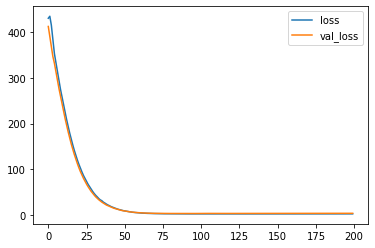

In [ ]:
feats= SMRfeat()
X_feat = feats.fit_transform(xtensor)
net= SMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1)
predict_data = net.fit(X_feat , zpca)

In [ ]:
mdl = net.get_model()
w = get_weigths(mdl,2)

### Plots No MC

In [ ]:
db = loaddb.GIGA()
channels_names = db.metadata['channel_names']
montage = mne.channels.read_montage(db.metadata['montage'])

Model = {}
#Model["model"] = mdl
Model["weigths"] = w
Model["Ch_names"] = channels_names
Model["montage"] = montage

with open(Path_def+'models/wPLI_2f.p','wb') as handle:
                pickle.dump(Model,handle)

/usr/local/lib/python3.6/dist-packages/mne/utils/docs.py:824: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/mne/utils/docs.py:807: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)


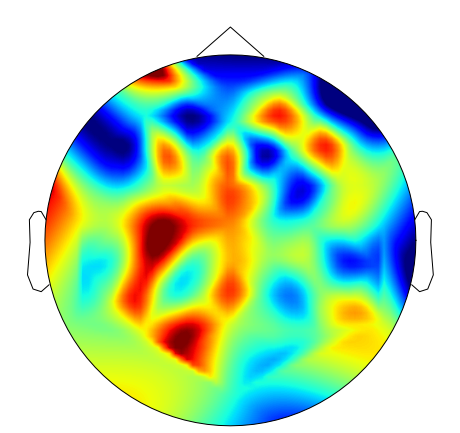

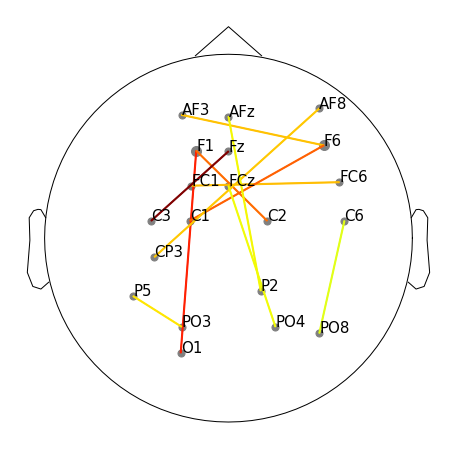

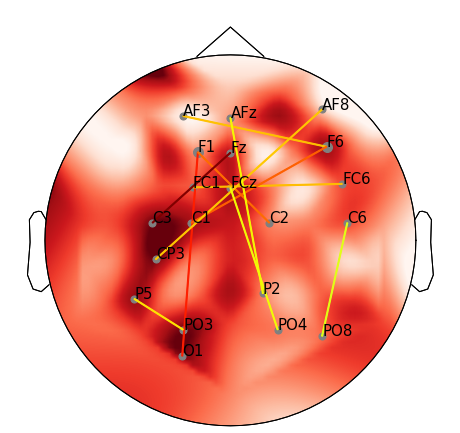

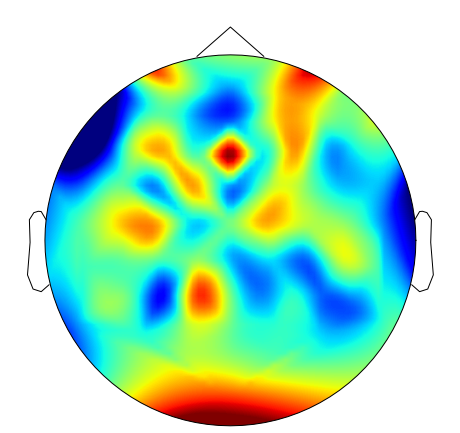

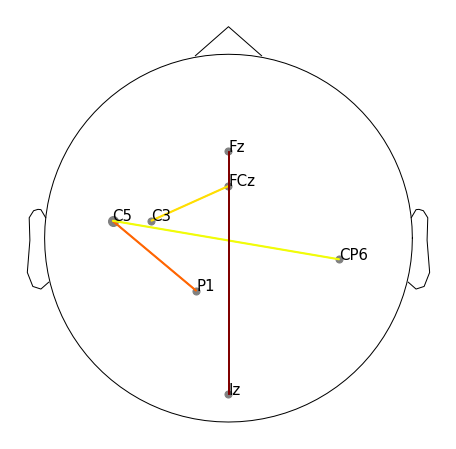

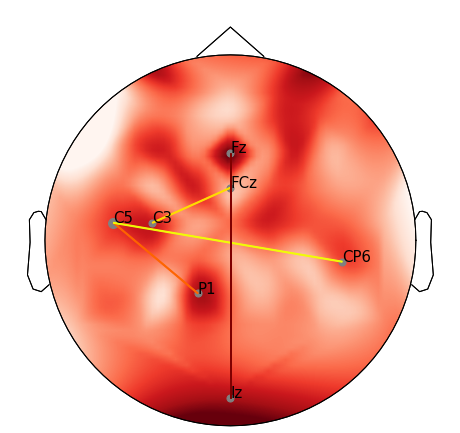

In [ ]:
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",colormap=False,save=True,name=Path_def+'Topoplots/wPLI_2f_topo_u')
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="Cx",colormap=False,save=True,name=Path_def+'Topoplots/wPLI_2f_Cx_u')
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="All",cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/wPLI_2f_All_u')

plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",colormap=False,save=True,name=Path_def+'Topoplots/wPLI_2f_topo_B')
plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="Cx",colormap=False,save=True,name=Path_def+'Topoplots/wPLI_2f_Cx_B')
plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="All",cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/wPLI_2f_All_B')

### Training MC

Epoch 1/200
2/2 [==============================] - 1s 199ms/step - loss: 430.7577 - val_loss: 414.3771
Epoch 2/200
2/2 [==============================] - 0s 62ms/step - loss: 431.2825 - val_loss: 394.7094
Epoch 3/200
2/2 [==============================] - 0s 55ms/step - loss: 403.8561 - val_loss: 373.0281
Epoch 4/200
2/2 [==============================] - 0s 55ms/step - loss: 378.2575 - val_loss: 351.9716
Epoch 5/200
2/2 [==============================] - 0s 55ms/step - loss: 356.9930 - val_loss: 336.5097
Epoch 6/200
2/2 [==============================] - 0s 53ms/step - loss: 338.4922 - val_loss: 319.0298
Epoch 7/200
2/2 [==============================] - 0s 53ms/step - loss: 318.6846 - val_loss: 301.1092
Epoch 8/200
2/2 [==============================] - 0s 59ms/step - loss: 300.3893 - val_loss: 283.8616
Epoch 9/200
2/2 [==============================] - 0s 67ms/step - loss: 282.8218 - val_loss: 267.0749
Epoch 10/200
2/2 [==============================] - 0s 55ms/step - loss: 265.7119

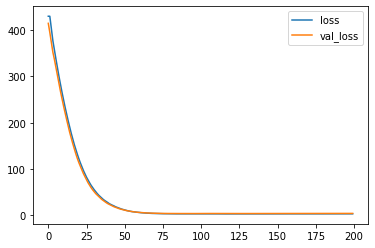

In [ ]:
feats= SMRfeat()
X_feat = feats.fit_transform(xtensor)
net= MCSMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1,plot_hst=True,alpha_dropout=False)
predict_data = net.fit(X_feat , zpca)

In [ ]:
mdl = net.get_model()
w = get_weigths(mdl,2)

### Plots MC

In [ ]:
db = loaddb.GIGA()
channels_names = db.metadata['channel_names']
montage = mne.channels.read_montage(db.metadata['montage'])

Model = {}
#Model["model"] = mdl
Model["weigths"] = w
Model["Ch_names"] = channels_names
Model["montage"] = montage

with open(Path_def+'models/wPLI_2f_MC.p','wb') as handle:
                pickle.dump(Model,handle)

/usr/local/lib/python3.6/dist-packages/mne/utils/docs.py:824: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/mne/utils/docs.py:807: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)


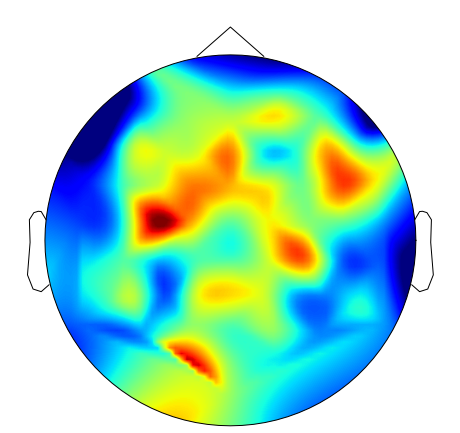

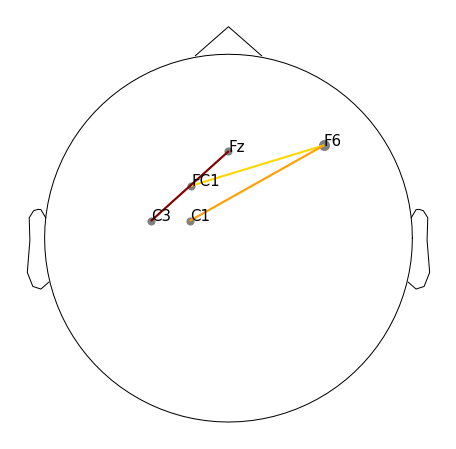

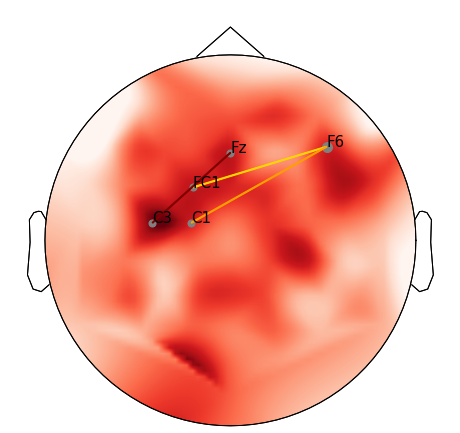

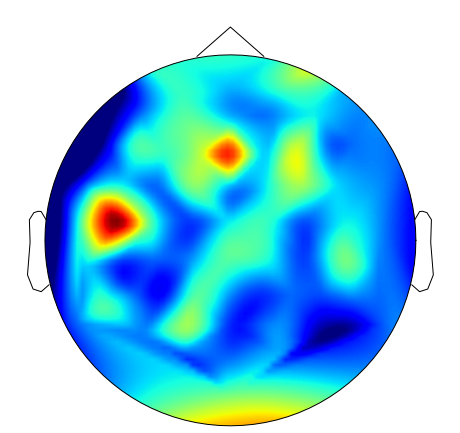

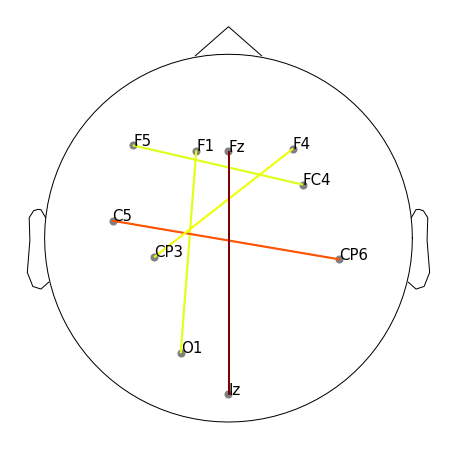

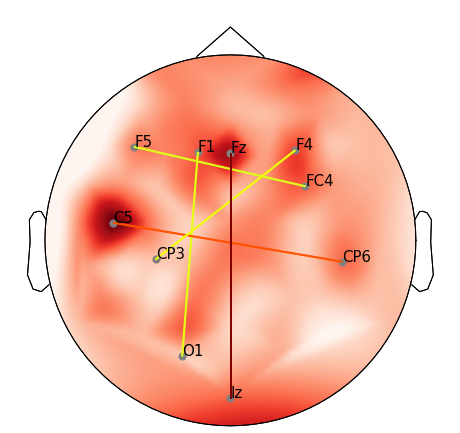

In [ ]:
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",colormap=False,save=True,name=Path_def+'Topoplots/wPLI_2f_MC_topo_u')
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="Cx",colormap=False,save=True,name=Path_def+'Topoplots/wPLI_2f_MC_Cx_u')
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="All",cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/wPLI_2f_MC_All_u')

plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",colormap=False,save=True,name=Path_def+'Topoplots/wPLI_2f_MC_topo_B')
plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="Cx",colormap=False,save=True,name=Path_def+'Topoplots/wPLI_2f_MC_Cx_B')
plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="All",cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/wPLI_2f_MC_All_B')

## PLV

### Load Data

In [ ]:
FILEID = "1dvuv8b5Ld6aKIVmJ5kOaMxHm3u5GCvch"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O connectividades_daniel.zip && rm -rf /tmp/cookies.txt
!dir
!unzip connectividades_daniel.zip

--2020-12-18 03:16:43--  https://docs.google.com/uc?export=download&confirm=&id=1dvuv8b5Ld6aKIVmJ5kOaMxHm3u5GCvch
Resolving docs.google.com (docs.google.com)... 74.125.195.102, 74.125.195.113, 74.125.195.138, ...
Connecting to docs.google.com (docs.google.com)|74.125.195.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-c4-docs.googleusercontent.com/docs/securesc/i5ghpcumheojms8uiucjcvgulkjsnn8d/m91stotga3mtlrscr51n280qln6rq3oc/1608261375000/17600740636788319470/14159977677146122232Z/1dvuv8b5Ld6aKIVmJ5kOaMxHm3u5GCvch?e=download [following]
--2020-12-18 03:16:43--  https://doc-04-c4-docs.googleusercontent.com/docs/securesc/i5ghpcumheojms8uiucjcvgulkjsnn8d/m91stotga3mtlrscr51n280qln6rq3oc/1608261375000/17600740636788319470/14159977677146122232Z/1dvuv8b5Ld6aKIVmJ5kOaMxHm3u5GCvch?e=download
Resolving doc-04-c4-docs.googleusercontent.com (doc-04-c4-docs.googleusercontent.com)... 74.125.195.132, 2607:f8b0:400e:c09::84
Connecting to 

In [ ]:
data = loadmat('Data_resting_C3andC4.mat')

mea = data['means']
sc_ma = StandardScaler()
acc_m = mea.mean(axis=1)

ma_z = sc_ma.fit_transform(mea)
 
zpca = ma_z[:,3].reshape(-1,1)

In [ ]:
x= pickle.load( open( "connectividad_daniel_giga_2bandas.pickle", "rb" ) )
indx = loadmat('Means_giga_mayo.mat')['S1'].ravel()
xtensor = create_tensor_giga(x,indx)[:,:,:,0]

(50, 2016, 2, 1)


### Training No Mc

Epoch 1/200
2/2 [==============================] - 1s 204ms/step - loss: 434.9128 - val_loss: 415.2243
Epoch 2/200
2/2 [==============================] - 0s 66ms/step - loss: 430.5659 - val_loss: 394.2258
Epoch 3/200
2/2 [==============================] - 0s 56ms/step - loss: 405.2184 - val_loss: 376.9715
Epoch 4/200
2/2 [==============================] - 0s 62ms/step - loss: 381.6793 - val_loss: 355.7257
Epoch 5/200
2/2 [==============================] - 0s 54ms/step - loss: 352.9199 - val_loss: 332.1654
Epoch 6/200
2/2 [==============================] - 0s 56ms/step - loss: 330.0052 - val_loss: 312.9463
Epoch 7/200
2/2 [==============================] - 0s 56ms/step - loss: 311.0822 - val_loss: 293.5885
Epoch 8/200
2/2 [==============================] - 0s 205ms/step - loss: 291.4848 - val_loss: 274.3000
Epoch 9/200
2/2 [==============================] - 0s 60ms/step - loss: 272.5517 - val_loss: 255.6907
Epoch 10/200
2/2 [==============================] - 0s 55ms/step - loss: 254.229

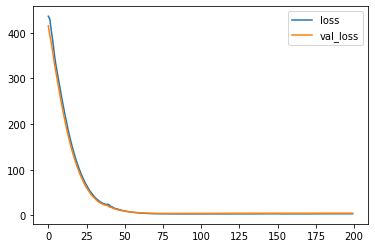

In [ ]:
feats= SMRfeat()
X_feat = feats.fit_transform(xtensor)
net= SMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1)
predict_data = net.fit(X_feat , zpca)

In [ ]:
mdl = net.get_model()
w = get_weigths(mdl,2)

### Plos No Mc

In [ ]:
db = loaddb.GIGA()
channels_names = db.metadata['channel_names']
montage = mne.channels.read_montage(db.metadata['montage'])

Model["weigths"] = w
Model["Ch_names"] = channels_names
Model["montage"] = montage

with open(Path_def+'models/PLV_2f.p','wb') as handle:
                pickle.dump(Model,handle)

/usr/local/lib/python3.6/dist-packages/mne/utils/docs.py:824: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/mne/utils/docs.py:807: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)


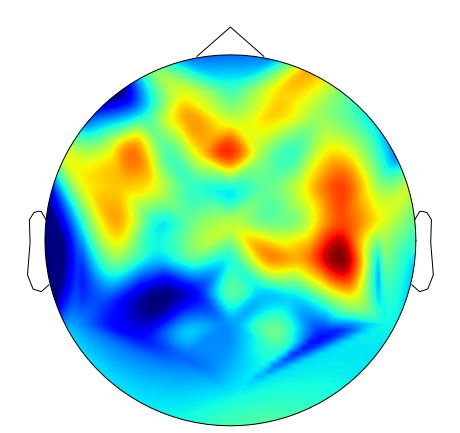

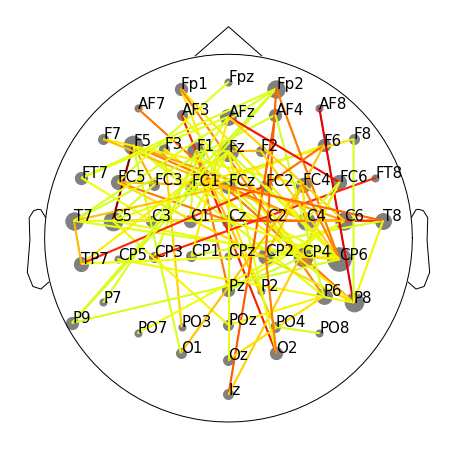

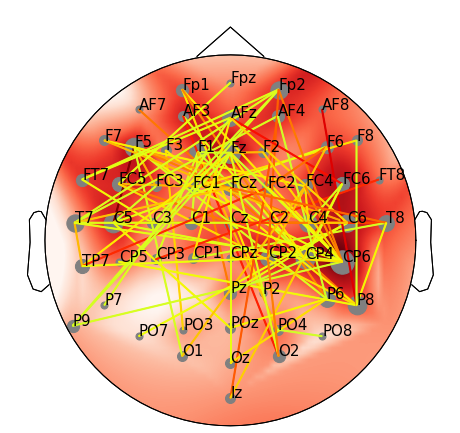

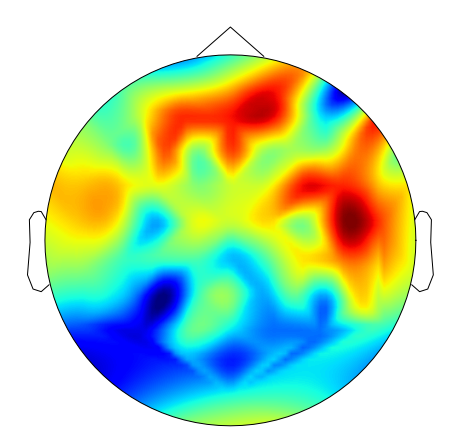

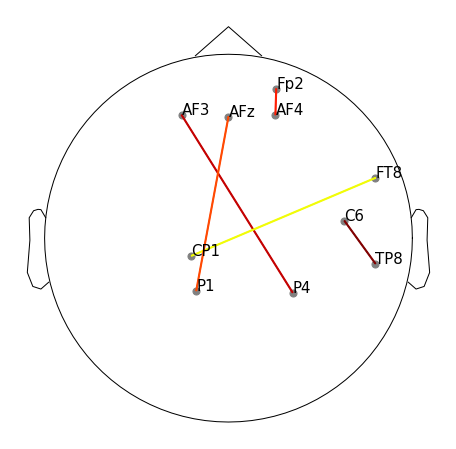

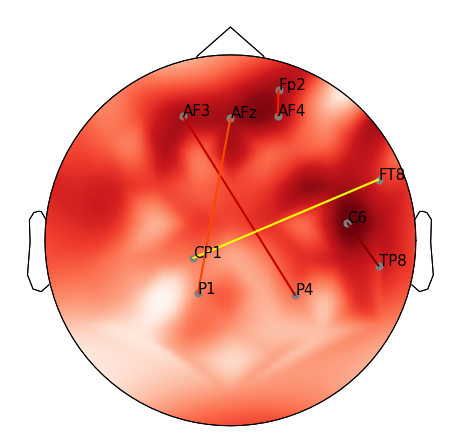

In [ ]:
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",colormap=False,save=True,name=Path_def+'Topoplots/PLV_2f_topo_u')
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="Cx",colormap=False,save=True,name=Path_def+'Topoplots/PLV_2f_Cx_u')
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="All",cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/PLV_2f_All_u')

plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",colormap=False,save=True,name=Path_def+'Topoplots/PLV_2f_topo_B')
plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="Cx",colormap=False,save=True,name=Path_def+'Topoplots/PLV_2f_Cx_B')
plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="All",cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/PLV_2f_All_B')

### Training MC

Epoch 1/200
2/2 [==============================] - 1s 384ms/step - loss: 431.8688 - val_loss: 428.6382
Epoch 2/200
2/2 [==============================] - 0s 58ms/step - loss: 436.1547 - val_loss: 408.9663
Epoch 3/200
2/2 [==============================] - 0s 59ms/step - loss: 409.4928 - val_loss: 380.6521
Epoch 4/200
2/2 [==============================] - 0s 57ms/step - loss: 384.0700 - val_loss: 357.7370
Epoch 5/200
2/2 [==============================] - 0s 58ms/step - loss: 359.1646 - val_loss: 339.9356
Epoch 6/200
2/2 [==============================] - 0s 58ms/step - loss: 340.3498 - val_loss: 323.1092
Epoch 7/200
2/2 [==============================] - 0s 57ms/step - loss: 321.3896 - val_loss: 305.1953
Epoch 8/200
2/2 [==============================] - 0s 56ms/step - loss: 302.3399 - val_loss: 288.1528
Epoch 9/200
2/2 [==============================] - 0s 57ms/step - loss: 285.4011 - val_loss: 269.5729
Epoch 10/200
2/2 [==============================] - 0s 55ms/step - loss: 267.3528

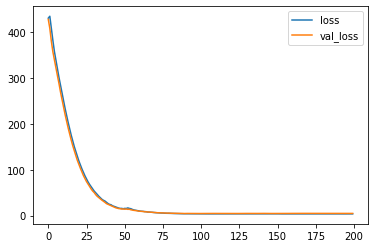

In [ ]:
feats= SMRfeat()
X_feat = feats.fit_transform(xtensor)
net= MCSMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1,plot_hst=True,alpha_dropout=False)
predict_data = net.fit(X_feat , zpca)

In [ ]:
mdl = net.get_model()
w = get_weigths(mdl,2)

### Plots MC

In [ ]:
db = loaddb.GIGA()
channels_names = db.metadata['channel_names']
montage = mne.channels.read_montage(db.metadata['montage'])

Model["weigths"] = w
Model["Ch_names"] = channels_names
Model["montage"] = montage

with open(Path_def+'models/PLV_2f_MC.p','wb') as handle:
                pickle.dump(Model,handle)

/usr/local/lib/python3.6/dist-packages/mne/utils/docs.py:824: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/mne/utils/docs.py:807: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)


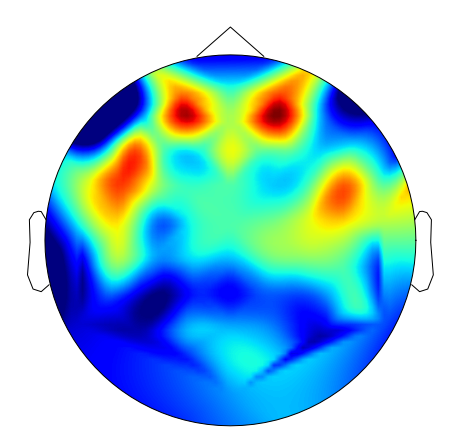

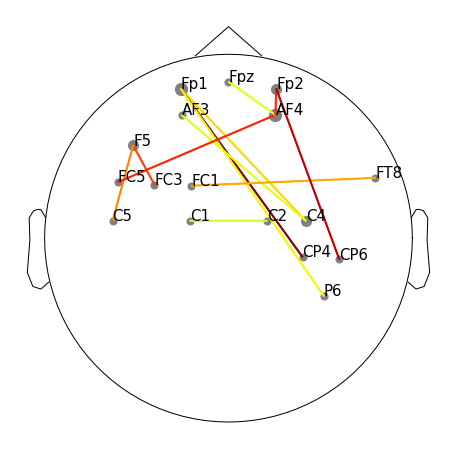

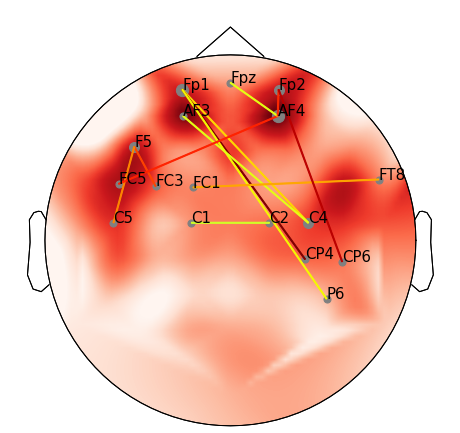

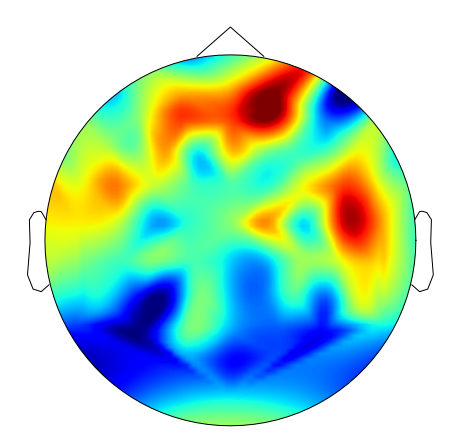

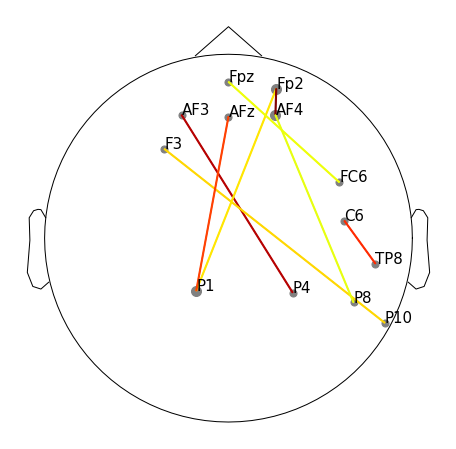

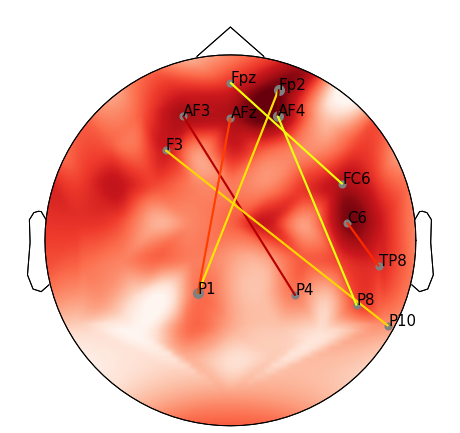

In [ ]:
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",colormap=False,save=True,name=Path_def+'Topoplots/PLV_2f_MC_topo_u')
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="Cx",colormap=False,save=True,name=Path_def+'Topoplots/PLV_2f_MC_Cx_u')
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="All",cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/PLV_2f_MC_All_u')

plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",colormap=False,save=True,name=Path_def+'Topoplots/PLV_2f_MC_topo_B')
plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="Cx",colormap=False,save=True,name=Path_def+'Topoplots/PLV_2f_MC_Cx_B')
plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="All",cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/PLV_2f_MC_All_B')

## Strength Thr

### Load Data

In [ ]:
data = loadmat('Data_resting_C3andC4.mat')

mea = data['means']
sc_ma = StandardScaler()
acc_m = mea.mean(axis=1)

ma_z = sc_ma.fit_transform(mea)
 
zpca = ma_z[:,3].reshape(-1,1)

In [ ]:
x = pickle.load(open( "giga_V1_suxchaxfre.pickle", "rb" ))[0] # UM
indx = loadmat('Means_giga_mayo.mat')['S1'].ravel()
xtensor = create_tensor_giga(x,indx)[:,:,[1,2]]

(50, 64, 5)


### Training No MC

Epoch 1/200
2/2 [==============================] - 1s 195ms/step - loss: 3.8353 - val_loss: 4.0749
Epoch 2/200
2/2 [==============================] - 0s 39ms/step - loss: 3.7414 - val_loss: 4.0981
Epoch 3/200
2/2 [==============================] - 0s 36ms/step - loss: 3.6134 - val_loss: 4.0603
Epoch 4/200
2/2 [==============================] - 0s 36ms/step - loss: 3.4337 - val_loss: 3.9879
Epoch 5/200
2/2 [==============================] - 0s 37ms/step - loss: 3.3253 - val_loss: 3.9580
Epoch 6/200
2/2 [==============================] - 0s 37ms/step - loss: 3.3207 - val_loss: 3.9569
Epoch 7/200
2/2 [==============================] - 0s 36ms/step - loss: 3.1588 - val_loss: 3.9907
Epoch 8/200
2/2 [==============================] - 0s 36ms/step - loss: 3.1393 - val_loss: 4.0391
Epoch 9/200
2/2 [==============================] - 0s 37ms/step - loss: 3.1368 - val_loss: 4.0537
Epoch 10/200
2/2 [==============================] - 0s 36ms/step - loss: 3.1026 - val_loss: 4.0417
Epoch 11/200
2/2 [

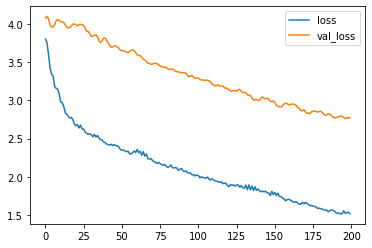

In [ ]:
feats= SMRfeat()
X_feat = feats.fit_transform(xtensor)
net= SMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1)
predict_data = net.fit(X_feat , zpca)

In [ ]:
mdl = net.get_model()
w = get_weigths(mdl,2)

### Plots NO MC

In [ ]:
db = loaddb.GIGA()
channels_names = db.metadata['channel_names']
montage = mne.channels.read_montage(db.metadata['montage'])

Model["weigths"] = w
Model["Ch_names"] = channels_names
Model["montage"] = montage

with open(Path_def+'models/Strength_tr_2f.p','wb') as handle:
                pickle.dump(Model,handle)

/usr/local/lib/python3.6/dist-packages/mne/utils/docs.py:824: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/mne/utils/docs.py:807: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)


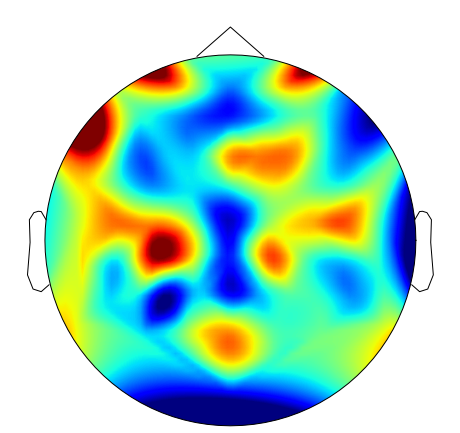

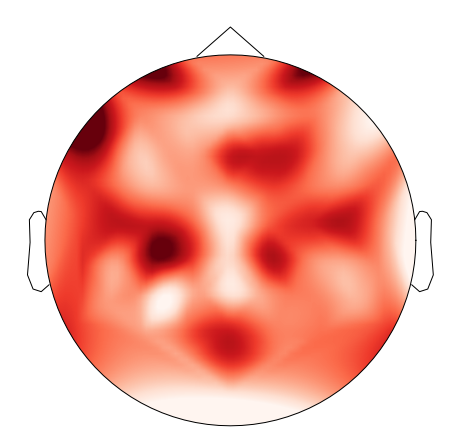

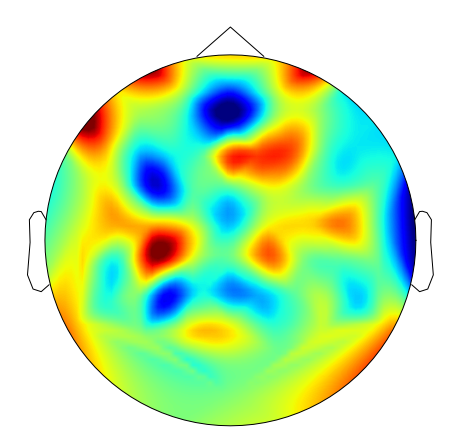

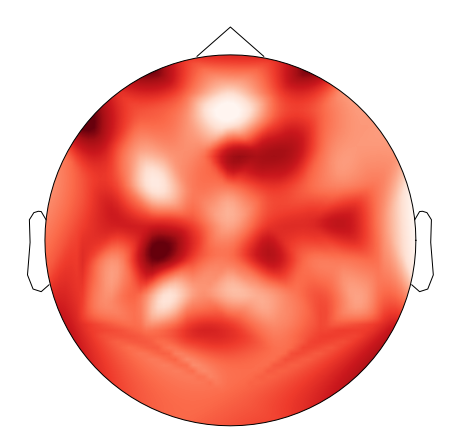

In [ ]:
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Strength_tr_2f_topo_u')
#plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.5,size=(8,8),mode="Cx",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Strength_tr_2f_Cx_u')
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/Strength_tr_2f_All_u')

plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Strength_tr_2f_topo_B')
#plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.5,size=(8,8),mode="Cx",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Strength_tr_2f_Cx_B')
plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/Strength_tr_2f_All_B')

### Train MC

Epoch 1/200
2/2 [==============================] - 1s 181ms/step - loss: 3.8939 - val_loss: 4.0449
Epoch 2/200
2/2 [==============================] - 0s 40ms/step - loss: 3.7647 - val_loss: 4.0395
Epoch 3/200
2/2 [==============================] - 0s 36ms/step - loss: 3.8245 - val_loss: 4.0060
Epoch 4/200
2/2 [==============================] - 0s 36ms/step - loss: 3.5720 - val_loss: 3.9884
Epoch 5/200
2/2 [==============================] - 0s 37ms/step - loss: 3.4428 - val_loss: 3.9659
Epoch 6/200
2/2 [==============================] - 0s 37ms/step - loss: 3.5112 - val_loss: 3.9558
Epoch 7/200
2/2 [==============================] - 0s 38ms/step - loss: 3.4170 - val_loss: 3.9486
Epoch 8/200
2/2 [==============================] - 0s 36ms/step - loss: 3.2389 - val_loss: 3.9335
Epoch 9/200
2/2 [==============================] - 0s 38ms/step - loss: 3.4758 - val_loss: 3.8924
Epoch 10/200
2/2 [==============================] - 0s 36ms/step - loss: 3.3489 - val_loss: 3.8307
Epoch 11/200
2/2 [

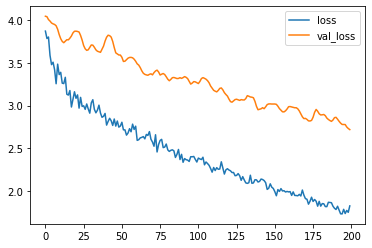

In [ ]:
feats= SMRfeat()
X_feat = feats.fit_transform(xtensor)
net= MCSMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1,plot_hst=True,alpha_dropout=False)
predict_data = net.fit(X_feat , zpca)

In [ ]:
mdl = net.get_model()
w = get_weigths(mdl,2)

### Plots MC

In [ ]:
db = loaddb.GIGA()
channels_names = db.metadata['channel_names']
montage = mne.channels.read_montage(db.metadata['montage'])

Model["weigths"] = w
Model["Ch_names"] = channels_names
Model["montage"] = montage

with open(Path_def+'models/Strength_tr_2f_MC.p','wb') as handle:
                pickle.dump(Model,handle)

/usr/local/lib/python3.6/dist-packages/mne/utils/docs.py:824: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/mne/utils/docs.py:807: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)


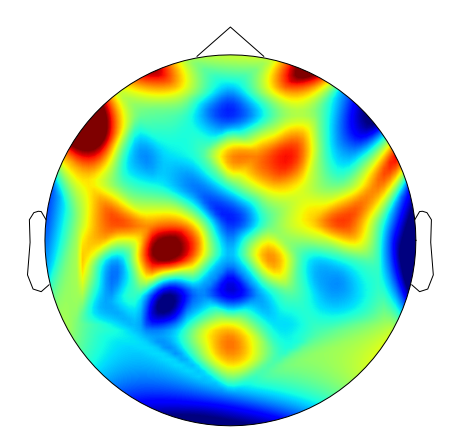

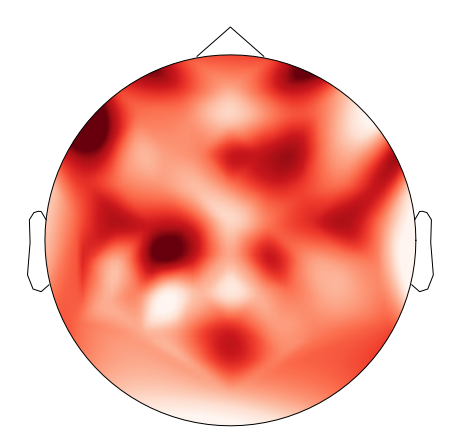

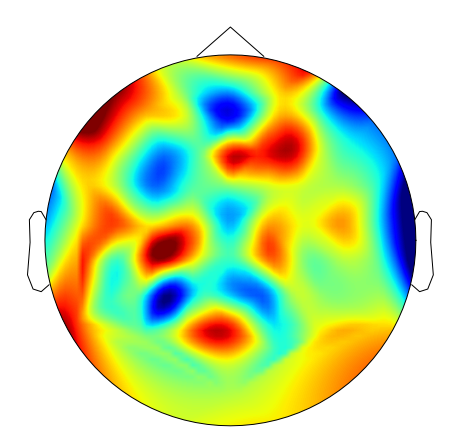

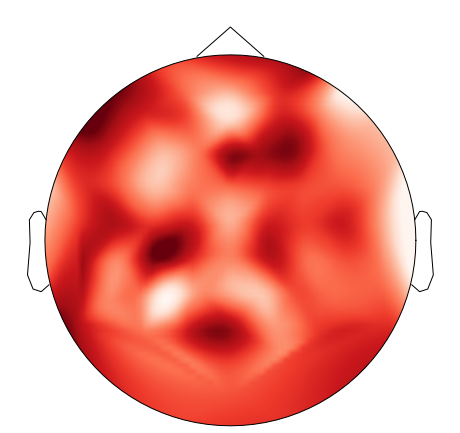

In [ ]:
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Strength_tr_2f_MC_topo_u')
#plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.5,size=(8,8),mode="Cx",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Strength_tr_2f_MC_Cx_u')
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/Strength_tr_2f_MC_All_u')

plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Strength_tr_2f_MC_topo_B')
#plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.5,size=(8,8),mode="Cx",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Strength_tr_2f_MC_Cx_B')
plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/Strength_tr_2f_MC_All_B')

## Strength

### Load Data

In [ ]:
data = loadmat('Data_resting_C3andC4.mat')

mea = data['means']
sc_ma = StandardScaler()
acc_m = mea.mean(axis=1)

ma_z = sc_ma.fit_transform(mea)
 
zpca = ma_z[:,3].reshape(-1,1)

In [ ]:
x = pickle.load(open( "giga_V2_suxchaxfre.pickle", "rb" ))[0] # sin UM
indx = loadmat('Means_giga_mayo.mat')['S1'].ravel()
xtensor = create_tensor_giga(x,indx)[:,:,[1,2]]

(50, 64, 5)


### Training No MC

Epoch 1/200
2/2 [==============================] - 1s 189ms/step - loss: 3.8018 - val_loss: 4.1126
Epoch 2/200
2/2 [==============================] - 0s 44ms/step - loss: 3.5732 - val_loss: 4.1425
Epoch 3/200
2/2 [==============================] - 0s 36ms/step - loss: 3.3890 - val_loss: 4.1525
Epoch 4/200
2/2 [==============================] - 0s 38ms/step - loss: 3.2882 - val_loss: 4.1492
Epoch 5/200
2/2 [==============================] - 0s 37ms/step - loss: 3.1669 - val_loss: 4.1782
Epoch 6/200
2/2 [==============================] - 0s 37ms/step - loss: 3.1121 - val_loss: 4.2106
Epoch 7/200
2/2 [==============================] - 0s 38ms/step - loss: 3.0303 - val_loss: 4.2005
Epoch 8/200
2/2 [==============================] - 0s 45ms/step - loss: 2.9291 - val_loss: 4.1793
Epoch 9/200
2/2 [==============================] - 0s 38ms/step - loss: 2.8892 - val_loss: 4.1338
Epoch 10/200
2/2 [==============================] - 0s 38ms/step - loss: 2.8478 - val_loss: 4.0851
Epoch 11/200
2/2 [

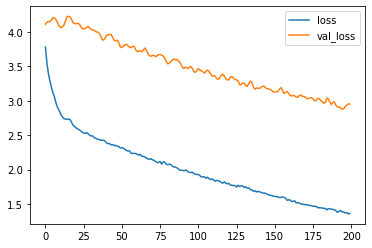

In [ ]:
feats= SMRfeat()
X_feat = feats.fit_transform(xtensor)
net= SMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1)
predict_data = net.fit(X_feat , zpca)

In [ ]:
mdl = net.get_model()
w = get_weigths(mdl,2)

### Plots No MC

In [ ]:
db = loaddb.GIGA()
channels_names = db.metadata['channel_names']
montage = mne.channels.read_montage(db.metadata['montage'])

Model["weigths"] = w
Model["Ch_names"] = channels_names
Model["montage"] = montage

with open(Path_def+'models/Strength_2f.p','wb') as handle:
                pickle.dump(Model,handle)

/usr/local/lib/python3.6/dist-packages/mne/utils/docs.py:824: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/mne/utils/docs.py:807: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)


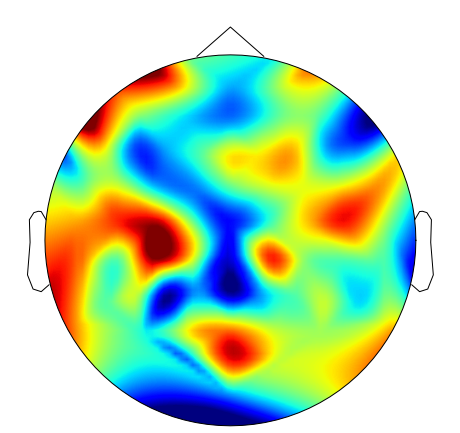

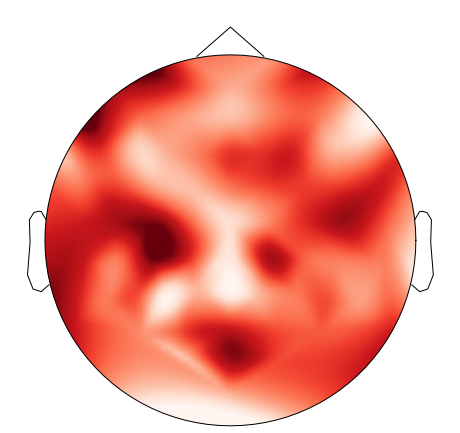

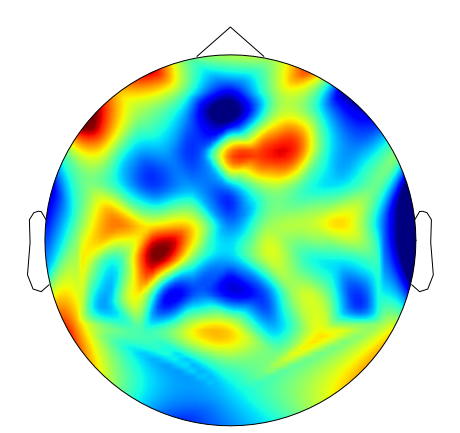

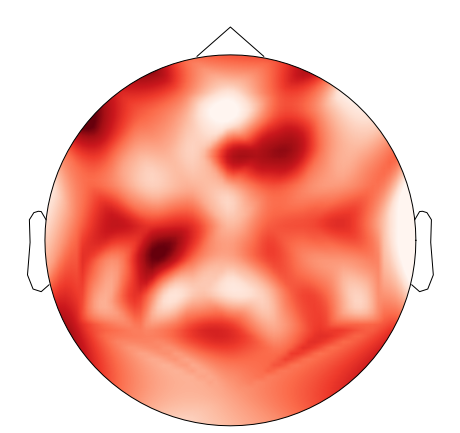

In [ ]:
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Strength_2f_topo_u')
#plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.5,size=(8,8),mode="Cx",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Strength_2f_Cx_u')
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/Strength_2f_All_u')

plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Strength_2f_topo_B')
#plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.5,size=(8,8),mode="Cx",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Strength_2f_Cx_B')
plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/Strength_2f_All_B')

### Training MC

Epoch 1/200
2/2 [==============================] - 1s 181ms/step - loss: 3.8594 - val_loss: 4.1365
Epoch 2/200
2/2 [==============================] - 0s 39ms/step - loss: 3.7071 - val_loss: 4.1506
Epoch 3/200
2/2 [==============================] - 0s 37ms/step - loss: 3.7246 - val_loss: 4.1399
Epoch 4/200
2/2 [==============================] - 0s 40ms/step - loss: 3.5010 - val_loss: 4.1382
Epoch 5/200
2/2 [==============================] - 0s 39ms/step - loss: 3.4033 - val_loss: 4.1497
Epoch 6/200
2/2 [==============================] - 0s 39ms/step - loss: 3.4281 - val_loss: 4.1650
Epoch 7/200
2/2 [==============================] - 0s 37ms/step - loss: 3.3554 - val_loss: 4.1765
Epoch 8/200
2/2 [==============================] - 0s 37ms/step - loss: 3.2016 - val_loss: 4.1392
Epoch 9/200
2/2 [==============================] - 0s 36ms/step - loss: 3.3248 - val_loss: 4.0744
Epoch 10/200
2/2 [==============================] - 0s 35ms/step - loss: 3.2064 - val_loss: 3.9904
Epoch 11/200
2/2 [

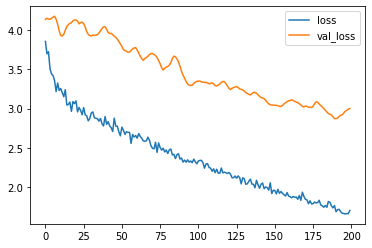

In [ ]:
feats= SMRfeat()
X_feat = feats.fit_transform(xtensor)
net= MCSMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1,plot_hst=True,alpha_dropout=False)
predict_data = net.fit(X_feat , zpca)

In [ ]:
mdl = net.get_model()
w = get_weigths(mdl,2)

### Plots MC

In [ ]:
db = loaddb.GIGA()
channels_names = db.metadata['channel_names']
montage = mne.channels.read_montage(db.metadata['montage'])

Model["weigths"] = w
Model["Ch_names"] = channels_names
Model["montage"] = montage

with open(Path_def+'models/Strength_2f_MC.p','wb') as handle:
                pickle.dump(Model,handle)

/usr/local/lib/python3.6/dist-packages/mne/utils/docs.py:824: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/mne/utils/docs.py:807: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)


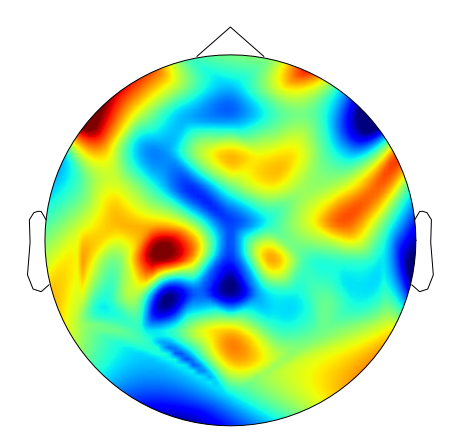

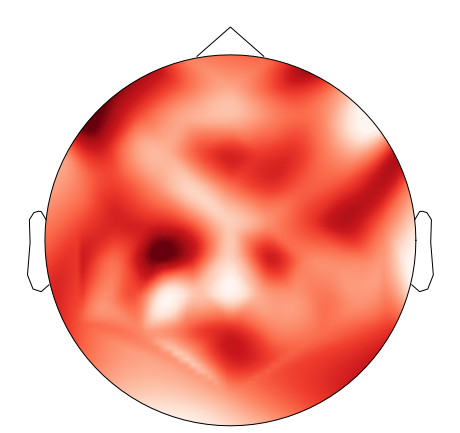

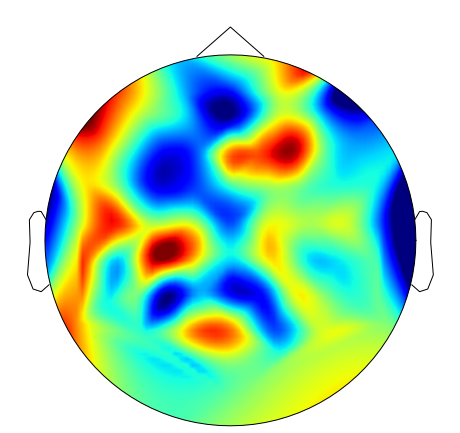

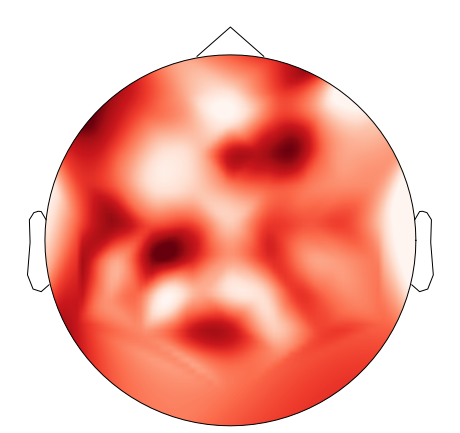

In [ ]:
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Strength_2f_MC_topo_u')
#plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.5,size=(8,8),mode="Cx",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Strength_2f_MC_Cx_u')
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/Strength_2f_MC_All_u')

plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Strength_2f_MC_topo_B')
#plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.5,size=(8,8),mode="Cx",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Strength_2f_MC_Cx_B')
plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/Strength_2f_MC_All_B')

## Clustering Thr

### Load Data

In [ ]:
data = loadmat('Data_resting_C3andC4.mat')

mea = data['means']
sc_ma = StandardScaler()
acc_m = mea.mean(axis=1)

ma_z = sc_ma.fit_transform(mea)
 
zpca = ma_z[:,3].reshape(-1,1)

In [ ]:
x = pickle.load(open( "giga_V1_suxchaxfre.pickle", "rb" ))[1] # UM
indx = loadmat('Means_giga_mayo.mat')['S1'].ravel()
xtensor = create_tensor_giga(x,indx)[:,:,[1,2]]

(50, 64, 5)


### Training No MC

Epoch 1/200
2/2 [==============================] - 1s 188ms/step - loss: 3.8773 - val_loss: 3.7099
Epoch 2/200
2/2 [==============================] - 0s 41ms/step - loss: 3.5854 - val_loss: 3.5568
Epoch 3/200
2/2 [==============================] - 0s 37ms/step - loss: 3.4621 - val_loss: 3.5748
Epoch 4/200
2/2 [==============================] - 0s 38ms/step - loss: 3.3583 - val_loss: 3.6104
Epoch 5/200
2/2 [==============================] - 0s 40ms/step - loss: 3.2288 - val_loss: 3.5959
Epoch 6/200
2/2 [==============================] - 0s 45ms/step - loss: 3.1739 - val_loss: 3.5943
Epoch 7/200
2/2 [==============================] - 0s 42ms/step - loss: 3.1001 - val_loss: 3.5824
Epoch 8/200
2/2 [==============================] - 0s 37ms/step - loss: 3.0422 - val_loss: 3.5896
Epoch 9/200
2/2 [==============================] - 0s 37ms/step - loss: 2.9994 - val_loss: 3.6504
Epoch 10/200
2/2 [==============================] - 0s 38ms/step - loss: 2.9469 - val_loss: 3.7076
Epoch 11/200
2/2 [

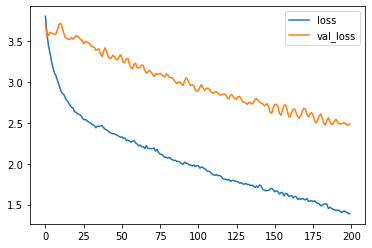

In [ ]:
feats= SMRfeat()
X_feat = feats.fit_transform(xtensor)
net= SMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1)
predict_data = net.fit(X_feat , zpca)

In [ ]:
mdl = net.get_model()
w = get_weigths(mdl,2)

### Plots No MC

In [ ]:
db = loaddb.GIGA()
channels_names = db.metadata['channel_names']
montage = mne.channels.read_montage(db.metadata['montage'])

Model["weigths"] = w
Model["Ch_names"] = channels_names
Model["montage"] = montage

with open(Path_def+'models/Clustering_tr_2f.p','wb') as handle:
                pickle.dump(Model,handle)

/usr/local/lib/python3.6/dist-packages/mne/utils/docs.py:824: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/mne/utils/docs.py:807: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)


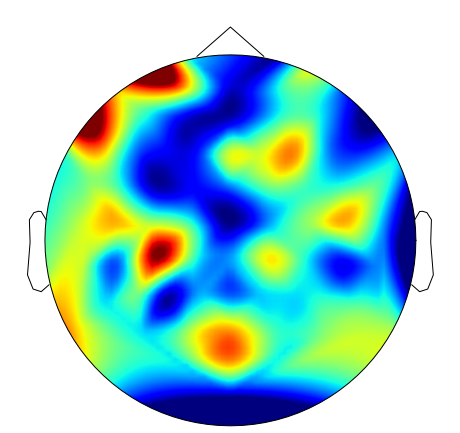

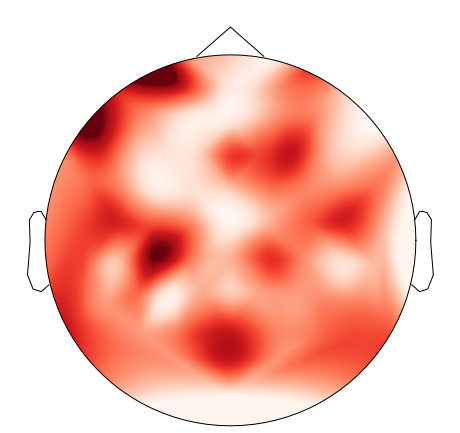

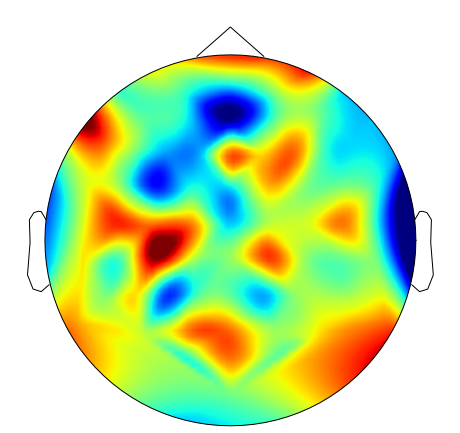

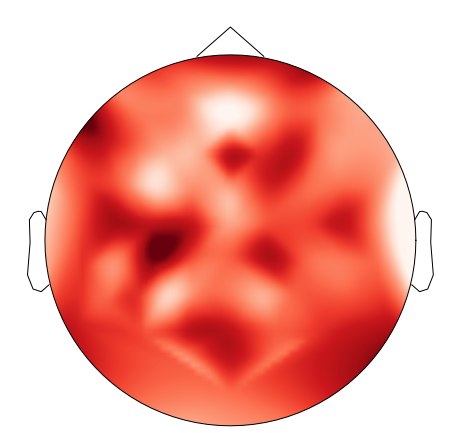

In [ ]:
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Clustering_tr_2f_topo_u')
#plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.5,size=(8,8),mode="Cx",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Clustering_tr_2f_Cx_u')
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/Clustering_tr_2f_All_u')

plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Clustering_tr_2f_topo_B')
#plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.5,size=(8,8),mode="Cx",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Clustering_tr_2f_Cx_B')
plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/Clustering_tr_2f_All_B')

### Training MC

Epoch 1/200
2/2 [==============================] - 1s 197ms/step - loss: 3.8983 - val_loss: 3.6182
Epoch 2/200
2/2 [==============================] - 0s 49ms/step - loss: 3.7241 - val_loss: 3.5355
Epoch 3/200
2/2 [==============================] - 0s 41ms/step - loss: 3.7238 - val_loss: 3.5452
Epoch 4/200
2/2 [==============================] - 0s 37ms/step - loss: 3.4751 - val_loss: 3.6468
Epoch 5/200
2/2 [==============================] - 0s 37ms/step - loss: 3.5424 - val_loss: 3.6818
Epoch 6/200
2/2 [==============================] - 0s 37ms/step - loss: 3.4679 - val_loss: 3.6611
Epoch 7/200
2/2 [==============================] - 0s 38ms/step - loss: 3.2770 - val_loss: 3.5935
Epoch 8/200
2/2 [==============================] - 0s 38ms/step - loss: 3.2364 - val_loss: 3.5513
Epoch 9/200
2/2 [==============================] - 0s 39ms/step - loss: 3.3245 - val_loss: 3.5357
Epoch 10/200
2/2 [==============================] - 0s 43ms/step - loss: 3.1276 - val_loss: 3.5352
Epoch 11/200
2/2 [

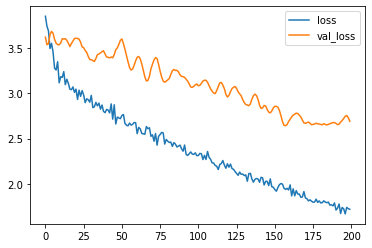

In [ ]:
feats= SMRfeat()
X_feat = feats.fit_transform(xtensor)
net= MCSMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1,plot_hst=True,alpha_dropout=False)
predict_data = net.fit(X_feat , zpca)

In [ ]:
mdl = net.get_model()
w = get_weigths(mdl,2)

### Plots MC

In [ ]:
db = loaddb.GIGA()
channels_names = db.metadata['channel_names']
montage = mne.channels.read_montage(db.metadata['montage'])

Model["weigths"] = w
Model["Ch_names"] = channels_names
Model["montage"] = montage

with open(Path_def+'models/Clustering_tr_2f_MC.p','wb') as handle:
                pickle.dump(Model,handle)

/usr/local/lib/python3.6/dist-packages/mne/utils/docs.py:824: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/mne/utils/docs.py:807: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)


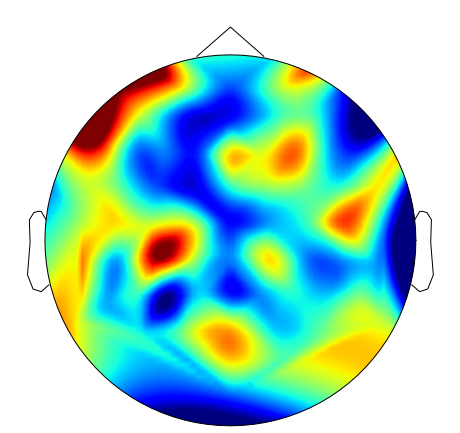

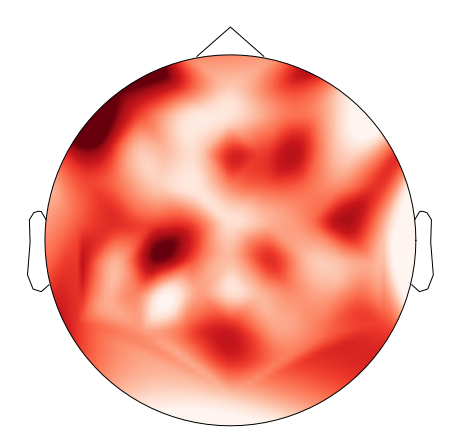

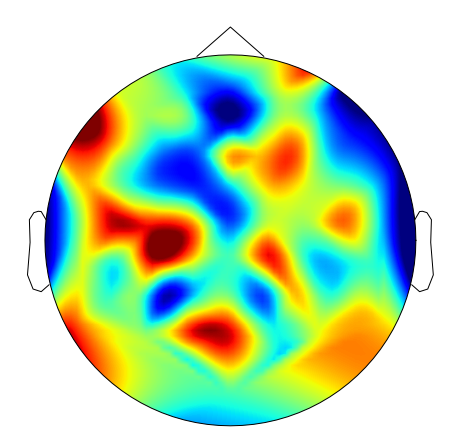

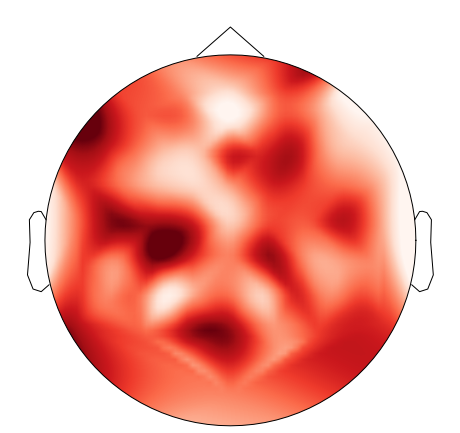

In [ ]:
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Clustering_tr_2f_MC_topo_u')
#plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.5,size=(8,8),mode="Cx",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Clustering_tr_2f_MC_Cx_u')
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/Clustering_tr_2f_MC_All_u')

plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Clustering_tr_2f_MC_topo_B')
#plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.5,size=(8,8),mode="Cx",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Clustering_tr_2f_MC_Cx_B')
plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/Clustering_tr_2f_MC_All_B')

## Clustering

### Load Data

In [ ]:
data = loadmat('Data_resting_C3andC4.mat')

mea = data['means']
sc_ma = StandardScaler()
acc_m = mea.mean(axis=1)

ma_z = sc_ma.fit_transform(mea)
 
zpca = ma_z[:,3].reshape(-1,1)

In [ ]:
x = pickle.load(open( "giga_V2_suxchaxfre.pickle", "rb" ))[1] # UM
indx = loadmat('Means_giga_mayo.mat')['S1'].ravel()
xtensor = create_tensor_giga(x,indx)[:,:,[1,2]]

(50, 64, 5)


### Training No MC

Epoch 1/200
2/2 [==============================] - 1s 185ms/step - loss: 3.8240 - val_loss: 3.3848
Epoch 2/200
2/2 [==============================] - 0s 45ms/step - loss: 3.7388 - val_loss: 3.4029
Epoch 3/200
2/2 [==============================] - 0s 40ms/step - loss: 3.5419 - val_loss: 3.4253
Epoch 4/200
2/2 [==============================] - 0s 38ms/step - loss: 3.4296 - val_loss: 3.4055
Epoch 5/200
2/2 [==============================] - 0s 36ms/step - loss: 3.2861 - val_loss: 3.3569
Epoch 6/200
2/2 [==============================] - 0s 40ms/step - loss: 3.2957 - val_loss: 3.3271
Epoch 7/200
2/2 [==============================] - 0s 36ms/step - loss: 3.2275 - val_loss: 3.3337
Epoch 8/200
2/2 [==============================] - 0s 40ms/step - loss: 3.1645 - val_loss: 3.3442
Epoch 9/200
2/2 [==============================] - 0s 38ms/step - loss: 3.1172 - val_loss: 3.3324
Epoch 10/200
2/2 [==============================] - 0s 37ms/step - loss: 3.1202 - val_loss: 3.3025
Epoch 11/200
2/2 [

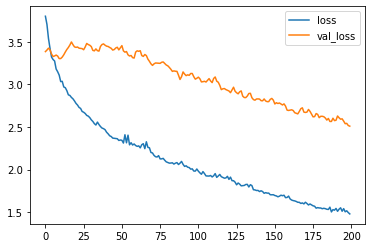

In [ ]:
feats= SMRfeat()
X_feat = feats.fit_transform(xtensor)
net= SMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1)
predict_data = net.fit(X_feat , zpca)

In [ ]:
mdl = net.get_model()
w = get_weigths(mdl,2)

### Plots No MC

In [ ]:
db = loaddb.GIGA()
channels_names = db.metadata['channel_names']
montage = mne.channels.read_montage(db.metadata['montage'])

Model["weigths"] = w
Model["Ch_names"] = channels_names
Model["montage"] = montage

with open(Path_def+'models/Clustering_2f.p','wb') as handle:
                pickle.dump(Model,handle)

/usr/local/lib/python3.6/dist-packages/mne/utils/docs.py:824: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/mne/utils/docs.py:807: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)


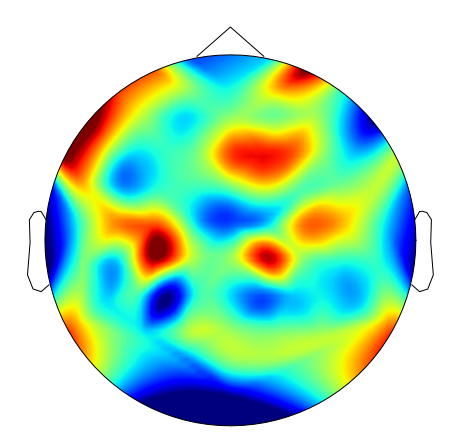

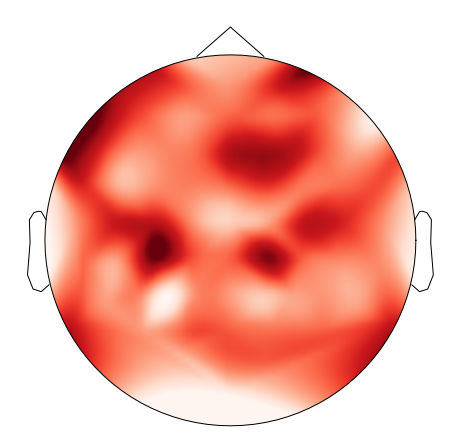

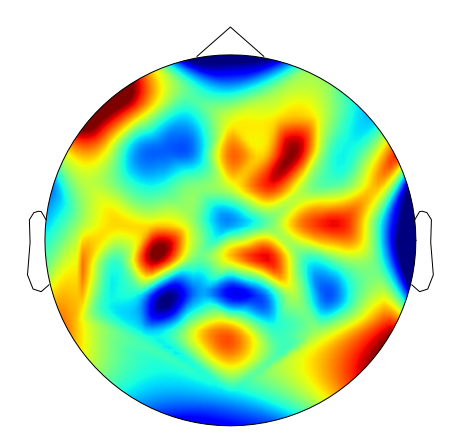

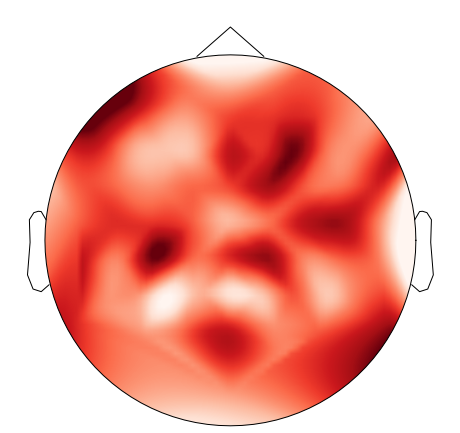

In [ ]:
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Clustering_2f_topo_u')
#plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.5,size=(8,8),mode="Cx",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Clustering_2f_Cx_u')
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/Clustering_2f_All_u')

plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Clustering_2f_topo_B')
#plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.5,size=(8,8),mode="Cx",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Clustering_2f_Cx_B')
plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/Clustering_2f_All_B')

### Training MC

Epoch 1/200
2/2 [==============================] - 1s 183ms/step - loss: 3.7273 - val_loss: 3.4393
Epoch 2/200
2/2 [==============================] - 0s 41ms/step - loss: 3.6877 - val_loss: 3.4081
Epoch 3/200
2/2 [==============================] - 0s 43ms/step - loss: 3.6430 - val_loss: 3.4344
Epoch 4/200
2/2 [==============================] - 0s 37ms/step - loss: 3.6026 - val_loss: 3.4615
Epoch 5/200
2/2 [==============================] - 0s 38ms/step - loss: 3.5057 - val_loss: 3.4796
Epoch 6/200
2/2 [==============================] - 0s 36ms/step - loss: 3.3188 - val_loss: 3.4933
Epoch 7/200
2/2 [==============================] - 0s 37ms/step - loss: 3.3616 - val_loss: 3.4848
Epoch 8/200
2/2 [==============================] - 0s 36ms/step - loss: 3.3164 - val_loss: 3.4530
Epoch 9/200
2/2 [==============================] - 0s 37ms/step - loss: 3.4134 - val_loss: 3.4315
Epoch 10/200
2/2 [==============================] - 0s 36ms/step - loss: 3.2766 - val_loss: 3.4246
Epoch 11/200
2/2 [

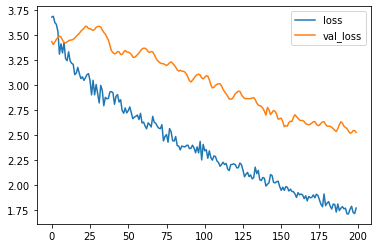

In [ ]:
feats= SMRfeat()
X_feat = feats.fit_transform(xtensor)
net= MCSMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1,plot_hst=True,alpha_dropout=False)
predict_data = net.fit(X_feat , zpca)

In [ ]:
mdl = net.get_model()
w = get_weigths(mdl,2)

### Plots MC

In [ ]:
db = loaddb.GIGA()
channels_names = db.metadata['channel_names']
montage = mne.channels.read_montage(db.metadata['montage'])

Model["weigths"] = w
Model["Ch_names"] = channels_names
Model["montage"] = montage

with open(Path_def+'models/Clustering_2f_MC.p','wb') as handle:
                pickle.dump(Model,handle)

/usr/local/lib/python3.6/dist-packages/mne/utils/docs.py:824: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/mne/utils/docs.py:807: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)


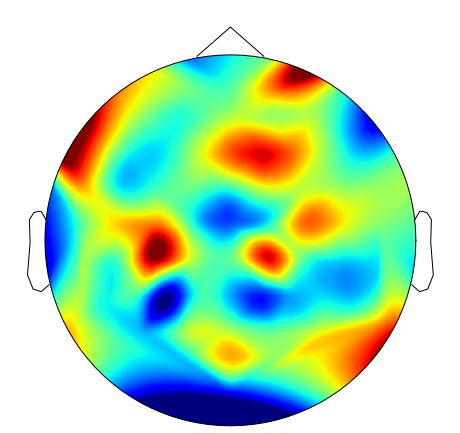

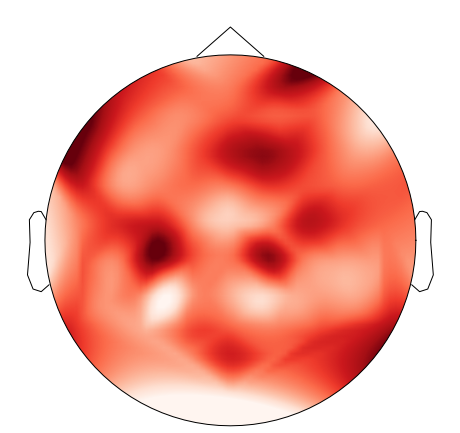

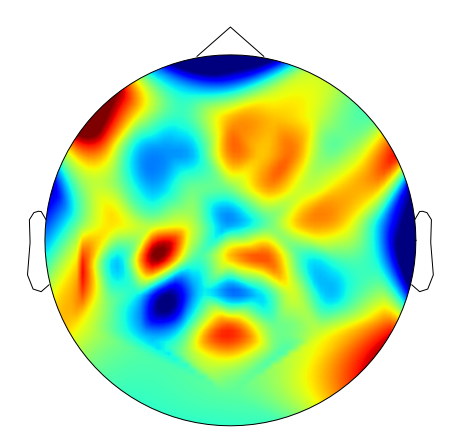

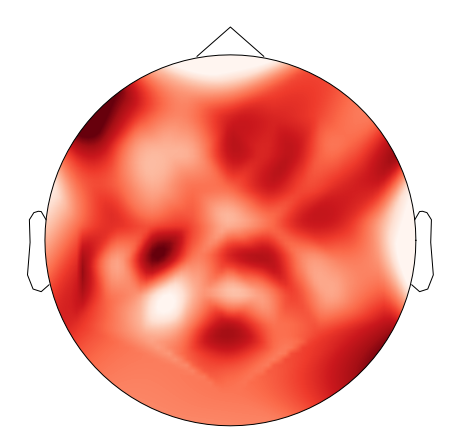

In [ ]:
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Clustering_2f_MC_topo_u')
#plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.5,size=(8,8),mode="Cx",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Clustering_2f_MC_Cx_u')
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/Clustering_2f_MC_All_u')

plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Clustering_2f_MC_topo_B')
#plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.5,size=(8,8),mode="Cx",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Clustering_2f_MC_Cx_B')
plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/Clustering_2f_MC_All_B')

## ALL Thr

### Load Data

In [ ]:
data = loadmat('Data_resting_C3andC4.mat')

mea = data['means']
sc_ma = StandardScaler()
acc_m = mea.mean(axis=1)

ma_z = sc_ma.fit_transform(mea)
 
zpca = ma_z[:,3].reshape(-1,1)

In [ ]:
indx = loadmat('Means_giga_mayo.mat')['S1'].ravel()
x_stren = pickle.load(open( "giga_V1_suxchaxfre.pickle", "rb" ))[0] # UM
xtensor_stren = create_tensor_giga(x_stren,indx)[:,:,[1,2]]
x_clust = pickle.load(open( "giga_V1_suxchaxfre.pickle", "rb" ))[1] # UM
xtensor_clust = create_tensor_giga(x_clust,indx)[:,:,[1,2]]

xtensor = np.concatenate((xtensor_stren,xtensor_clust),axis=1)

(50, 64, 5)
(50, 64, 5)


### Training No MC

Epoch 1/200
2/2 [==============================] - 1s 197ms/step - loss: 8.4278 - val_loss: 8.3340
Epoch 2/200
2/2 [==============================] - 0s 42ms/step - loss: 8.0965 - val_loss: 7.9858
Epoch 3/200
2/2 [==============================] - 0s 37ms/step - loss: 7.8446 - val_loss: 7.6480
Epoch 4/200
2/2 [==============================] - 0s 36ms/step - loss: 7.7727 - val_loss: 7.6817
Epoch 5/200
2/2 [==============================] - 0s 37ms/step - loss: 7.7418 - val_loss: 7.8547
Epoch 6/200
2/2 [==============================] - 0s 42ms/step - loss: 7.5880 - val_loss: 8.0052
Epoch 7/200
2/2 [==============================] - 0s 39ms/step - loss: 7.4453 - val_loss: 7.9381
Epoch 8/200
2/2 [==============================] - 0s 37ms/step - loss: 7.3505 - val_loss: 7.7903
Epoch 9/200
2/2 [==============================] - 0s 41ms/step - loss: 7.3646 - val_loss: 7.7391
Epoch 10/200
2/2 [==============================] - 0s 37ms/step - loss: 7.1743 - val_loss: 7.6813
Epoch 11/200
2/2 [

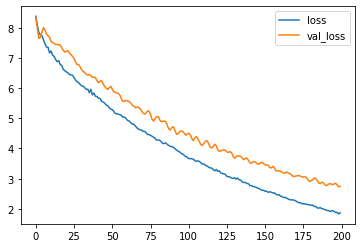

In [ ]:
feats= SMRfeat()
X_feat = feats.fit_transform(xtensor)
net= SMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1)
predict_data = net.fit(X_feat , zpca)

In [ ]:
mdl = net.get_model()
w = get_weigths(mdl,2)

### Plots No MC

In [ ]:
db = loaddb.GIGA()
channels_names = db.metadata['channel_names']
montage = mne.channels.read_montage(db.metadata['montage'])

Model["weigths"] = w
Model["Ch_names"] = channels_names
Model["montage"] = montage

with open(Path_def+'models/Both_tr_2f.p','wb') as handle:
                pickle.dump(Model,handle)

/usr/local/lib/python3.6/dist-packages/mne/utils/docs.py:824: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/mne/utils/docs.py:807: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)


ValueError: ignored

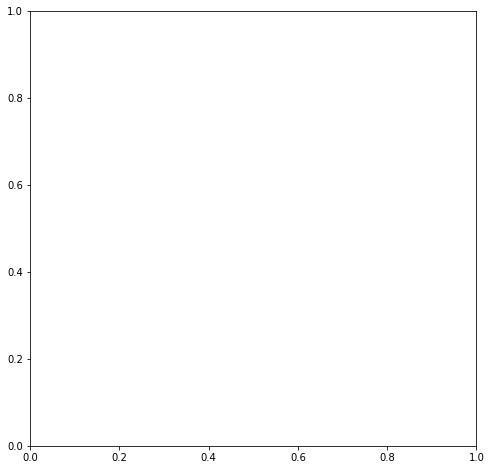

In [ ]:
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Both_tr_2f_topo_u')
#plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.5,size=(8,8),mode="Cx",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Clustering_2f_Cx_u')
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/Clustering_2f_All_u')

plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Both_tr_2f_topo_B')
#plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.5,size=(8,8),mode="Cx",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Clustering_2f_Cx_B')
plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/Clustering_2f_All_B')

### Training MC

In [ ]:
feats= SMRfeat()
X_feat = feats.fit_transform(xtensor)
net= MCSMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1,plot_hst=True,alpha_dropout=False)
predict_data = net.fit(X_feat , zpca)

In [ ]:
mdl = net.get_model()
w = get_weigths(mdl,2)

### Plots MC

In [ ]:
db = loaddb.GIGA()
channels_names = db.metadata['channel_names']
montage = mne.channels.read_montage(db.metadata['montage'])

Model["weigths"] = w
Model["Ch_names"] = channels_names
Model["montage"] = montage

with open(Path_def+'models/Both_tr_2f_MC.p','wb') as handle:
                pickle.dump(Model,handle)

In [ ]:
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Both_tr_2f_MC_topo_u')
#plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.5,size=(8,8),mode="Cx",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Clustering_2f_MC_Cx_u')
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/Clustering_2f_MC_All_u')

plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Both_tr_2f_MC_topo_B')
#plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.5,size=(8,8),mode="Cx",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Clustering_2f_MC_Cx_B')
plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/Clustering_2f_MC_All_B')

## ALL

### Load Data

In [ ]:
data = loadmat('Data_resting_C3andC4.mat')

mea = data['means']
sc_ma = StandardScaler()
acc_m = mea.mean(axis=1)

ma_z = sc_ma.fit_transform(mea)
 
zpca = ma_z[:,3].reshape(-1,1)

In [ ]:
indx = loadmat('Means_giga_mayo.mat')['S1'].ravel()
x_stren = pickle.load(open( "giga_V2_suxchaxfre.pickle", "rb" ))[0] # UM
xtensor_stren = create_tensor_giga(x_stren,indx)[:,:,[1,2]]
x_clust = pickle.load(open( "giga_V2_suxchaxfre.pickle", "rb" ))[1] # UM
xtensor_clust = create_tensor_giga(x_clust,indx)[:,:,[1,2]]

xtensor = np.concatenate((xtensor_stren,xtensor_clust),axis=1)

### Training No MC

In [ ]:
feats= SMRfeat()
X_feat = feats.fit_transform(xtensor)
net= SMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1)
predict_data = net.fit(X_feat , zpca)

In [ ]:
mdl = net.get_model()
w = get_weigths(mdl,2)

### Plots No MC

In [ ]:
db = loaddb.GIGA()
channels_names = db.metadata['channel_names']
montage = mne.channels.read_montage(db.metadata['montage'])

Model["weigths"] = w
Model["Ch_names"] = channels_names
Model["montage"] = montage

with open(Path_def+'models/Both_2f.p','wb') as handle:
                pickle.dump(Model,handle)

In [ ]:
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Both_2f_topo_u')
#plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.5,size=(8,8),mode="Cx",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Clustering_2f_Cx_u')
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/Clustering_2f_All_u')

plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Both_2f_topo_B')
#plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.5,size=(8,8),mode="Cx",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Clustering_2f_Cx_B')
plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/Clustering_2f_All_B')

### Training MC

In [ ]:
feats= SMRfeat()
X_feat = feats.fit_transform(xtensor)
net= MCSMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1,plot_hst=True,alpha_dropout=False)
predict_data = net.fit(X_feat , zpca)

In [ ]:
mdl = net.get_model()
w = get_weigths(mdl,2)

### Plots MC

In [ ]:
db = loaddb.GIGA()
channels_names = db.metadata['channel_names']
montage = mne.channels.read_montage(db.metadata['montage'])

Model["weigths"] = w
Model["Ch_names"] = channels_names
Model["montage"] = montage

with open(Path_def+'models/Both_2f_MC.p','wb') as handle:
                pickle.dump(Model,handle)

In [ ]:
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Both_2f_MC_topo_u')
#plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.5,size=(8,8),mode="Cx",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Clustering_2f_MC_Cx_u')
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/Clustering_2f_MC_All_u')

plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Both_2f_MC_topo_B')
#plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.5,size=(8,8),mode="Cx",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Clustering_2f_MC_Cx_B')
plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/Clustering_2f_MC_All_B')